Emanuele Mincaro (ID: 2019044) - Alberto Caregari  (ID: 2063085)

# Zeroth Order Methods for Adversarial Machine Learning
### Optimization for Data Science Project

September 2, 2022


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
import random
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.models import Model
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
import os
from tqdm import tqdm
from tabulate import tabulate
from pandas import DataFrame
import seaborn as sns

import time
import random

## Dataset

In [2]:
# Import MNIST Dataset
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

# convert image values from integers to floats
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

# Pixel intensity of the images are normalized from the value range 0–255 to 0–1.
train_x = train_x / 255.0
test_x = test_x / 255.0

# reshape the images into a matrix
train_x = train_x.reshape((60000, 784))
test_x = test_x.reshape((10000, 784))

# Split between train and validation set
val_dim = 5000
val_x = train_x[:val_dim]
val_y = train_y[:val_dim]

train_x = train_x[val_dim:]
train_y = train_y[val_dim:]

# One-hot encoding label 
train_y = tf.keras.utils.to_categorical(train_y)
val_y = tf.keras.utils.to_categorical(val_y)
test_y = tf.keras.utils.to_categorical(test_y)

# Model/data parameters
num_classes = 10
input_shape = (784,)

11501568/11490434 [==============================] - 0s 0us/step


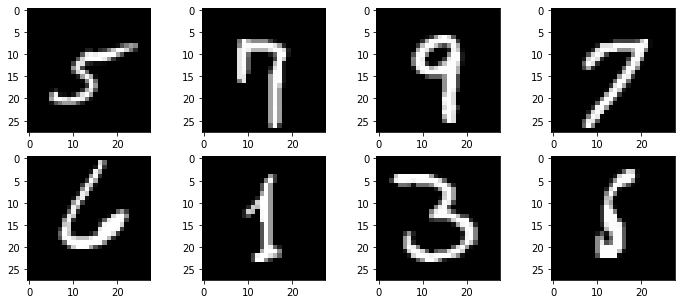

In [3]:
# plot random eight images
imag_x = train_x.reshape((55000, 28, 28))

plt.figure(figsize = (12,5))
for i in range(8):
  ind = random.randint(0, len(imag_x))
  plt.subplot(240+1+i)
  plt.imshow(imag_x[ind], cmap='gray')

# LeNet Model (Not Used)

In [ ]:
# def LeNet():
#   model = Sequential()
#   # reshape input
#   model.add(tf.keras.layers.Reshape((28,28,1), input_shape=input_shape))
  
#   # Convolutional layer  
#   model.add(Conv2D(filters = 6, kernel_size = (5,5), padding = 'same', 
#                    activation = 'relu', input_shape = (28,28,1)))
  
#   # Max-pooing layer with pooling window size is 2x2
#   model.add(MaxPooling2D(pool_size = (2,2)))
  
#   # Convolutional layer 
#   model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
  
#   # Max-pooling layer 
#   model.add(MaxPooling2D(pool_size = (2,2)))
  
#   # Flatten layer 
#   model.add(Flatten())
  
#   # The first fully connected layer 
#   model.add(Dense(120, activation = 'relu'))
  
#   # The output layer  
#  # model.add(Dense(10, activation = 'softmax'), name = "last_layer")
#   model.add(Dense(10, activation = 'softmax', name="last_dense"))

  
#   # compile the model with a loss function, a metric and an optimizer function
#   # In this case, the loss function is categorical crossentropy, 
#   # we use Stochastic Gradient Descent (SGD) method with learning rate lr = 0.01 
#   #  to optimize the loss function
#   # metric: accuracy 
  
#   opt = SGD(learning_rate = 0.01)
#   # Take the output of the last layer before the softmax operation
#   dnn = Model(inputs=model.input, outputs=model.get_layer("last_dense").output)
  
#   model.compile(loss = "categorical_crossentropy", 
#                 optimizer = opt, 
#                 metrics = ['accuracy']) 
                
#   return dnn, model



In [ ]:
# dnn, model = LeNet()
# model.summary()

Train the model ( Done only once)

In [ ]:

# def summary_history(history):
#   plt.figure(figsize = (10,6))
#   plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
#   plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
#   plt.legend()
#   plt.title('Accuracy')
#   plt.show()

# def train_model(model, X_train, y_train, X_test, y_test, epochs = 50, batch_size = 128):
#   # Rescaling all training and testing data
#   # Fitting the model on the training set
#   history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, 
#                       steps_per_epoch = X_train.shape[0]//batch_size, 
#                       validation_data = (X_test, y_test), 
#                       validation_steps = X_test.shape[0]//batch_size, verbose = 1)
#   # evaluating the model
#   _, acc = model.evaluate(X_test, y_test, verbose = 1)
#   print('%.3f' % (acc * 100.0))
#   summary_history(history)
  

In [ ]:
# train_model(LeNet_model, train_x, train_y, val_x, val_y)
# 30 sec fpr epochs
# loss: 0.0273 - accuracy: 0.9913 - val_loss: 0.0409 - val_accuracy: 0.9902

In [ ]:
# save model
# LeNet_model.save('model.h5')
# save model weight
# LeNet_model.save_weights('weight_model.h5', overwrite=True, save_format=None, options=None)


In [ ]:
# # Evaluate the model in the test set
# # Loads the weights
# path = "weight_model.h5"
# if os.path.isfile(path):
#   model.load_weights(path) 

#   # Evaluate the model on the test set
#   score = model.evaluate(test_x, test_y, verbose=0)
#   print("Test loss:", round(score[0],4))
#   print("Test accuracy: {:.2f} %".format(score[1]*100))
# else:
#   print(f"file {path} does not exist")


In [ ]:
# prediction = model.predict(test_x)

# Define the model


In [4]:
# Define the DNN architecture
model_2 = keras.Sequential()
model_2.add(tf.keras.Input(shape=input_shape))
model_2.add(tf.keras.layers.Reshape((28,28,1), input_shape=input_shape))
model_2.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
model_2.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_2.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model_2.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dense(200, activation="relu"))
model_2.add(tf.keras.layers.Dense(200, activation="relu"))
model_2.add(tf.keras.layers.Dense(num_classes, name="last_dense"))
model_2.add(tf.keras.layers.Activation("softmax"))

In [5]:
# Take the output of the last layer before the softmax operation  
dnn_2 = Model(inputs=model_2.input, outputs=model_2.get_layer("last_dense").output)

In [6]:
model_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Evaluate the model in the test set
# Loads the weights
path = "weight_model_2.h5"
if os.path.isfile(path):
  model_2.load_weights(path) 

  # Evaluate the model on the test set
  score = model_2.evaluate(test_x, test_y, verbose=0)
  print("Test loss:", round(score[0],4))
  print("Test accuracy: {:.2f} %".format(score[1]*100))
else:
  print(f"file {path} does not exist")


Test loss: 0.0273
Test accuracy: 99.40 %


# Utility Functions

In [7]:
###################################################
#          Plots loss and perturbations           #
###################################################

def plot_loss_pert(l_ZSCG, l_FZFW, l_FZCGS, epochs, title ='', savefig='', parameters = None):
    plt.figure(figsize=(10, 7))
    # Loss
    plt.grid()

    if savefig == '':
      plt.title('Loss function by Epochs')
    else:
      plt.title(title)
    plt.xlabel('Epochs', fontweight='bold', fontsize=15)
    plt.ylabel('Loss', fontweight='bold', fontsize=15)
    plt.plot(l_ZSCG, label = 'Loss ZSCG')
    plt.plot(l_FZFW, label = 'Loss FZFW')
    plt.plot(l_FZCGS, label = 'Loss FZCGS')

    plt.legend(fontsize='small')

    # save the figure
    if savefig != '':
      plt.savefig(savefig)

    plt.show()

In [8]:
def remove_misclassify_example(model, test_x, test_y):
  prediction = model.predict(test_x)
  ind = []
  for i in range(len(prediction)):
    if np.argmax(test_y[i]) != np.argmax(prediction[i]):
      ind.append(i)
  test_y_clean = test_y.copy()
  test_x_clean = test_x.copy()
  for i in ind[::-1]:
    test_y_clean = np.delete(test_y_clean, i, axis=0)
    test_x_clean = np.delete(test_x_clean, i, axis=0)
  score = model.evaluate(test_x_clean, test_y_clean, verbose=0)
  print("Test loss:", round(score[0],4))
  print("Test accuracy: {:.2f} %".format(score[1]*100))
  return  test_x_clean, test_y_clean

In [9]:
# Extract n equibalance images
def extract_all_images(x,y,n):
  """
  Extract some images of the same class

  Input:
  - x: set of images
  - y: labels of the images
  - n: number of images to extract for each number

  """
  ind = []
  size = int(n/10)
  for i in range(10):
    tmp = np.where([y.argmax(axis=1)==i])[1][:size]
    ind.append(tmp)
  fl_ind = [idx for sublist in ind for idx in sublist] # flatten the index
  
  x_extr = np.copy(x[fl_ind])
  y_extr = np.copy(y[fl_ind])
  
  return x_extr, y_extr

# Extract n images from the same class
def extract_sample_images(x,y,n,l):
  """
  Extract some images of the same class
  Input:
  - x: set of images
  - y: labels of the images
  - n: number of images to extract
  - l: label of the images
  """
  ind = []
  tmp = np.where([y.argmax(axis=1)==l])[1][:n]
  ind.append(tmp)
  fl_ind = [idx for sublist in ind for idx in sublist] # flatten the index
  
  x_extr = np.copy(x[fl_ind])
  y_extr = np.copy(y[fl_ind])
  
  return x_extr, y_extr

In [10]:
# Extract n equibalance images
def extract_all_images_test(x,y,n):

  ind = []
  size = int(n/10)
  for i in range(10):
    tmp = np.where([y.argmax(axis=1)==i])[1][-size:]
    ind.append(tmp)
  fl_ind = [idx for sublist in ind for idx in sublist] # flatten the index
  
  x_extr = np.copy(x[fl_ind])
  y_extr = np.copy(y[fl_ind])
  
  return x_extr, y_extr

# Extract n images from the same class
def extract_sample_images_test(x,y,n,l):

  ind = []
  tmp = np.where([y.argmax(axis=1)==l])[1][-n:]
  ind.append(tmp)
  fl_ind = [idx for sublist in ind for idx in sublist] # flatten the index
  
  x_extr = np.copy(x[fl_ind])
  y_extr = np.copy(y[fl_ind])
  
  return x_extr, y_extr

In [11]:
def misclassify_pred(x_per, y_true):
  predicted = dnn_2.predict(x_per).argmax(axis=1)
  true_labels = y_true.argmax(axis=1)
  y_correct = sum(predicted == true_labels)        # number of correct predictions
  y_wrong  = len(x_per) - y_correct                # number of wrong predictions
  wrong_labels = (y_wrong / len(predicted)) * 100  # rate of wrong predictions 
  return round(wrong_labels,2)

In [12]:
def cross_val(x_mod, y_true):
  tmp = np.zeros((10,10))
  predicted = dnn_2.predict(x_mod).argmax(axis=1)
  true_labels = y_true.argmax(axis=1)
  for i, t_l in enumerate(true_labels):
    tmp[t_l][predicted[i]] += 1
  return tmp


In [13]:
test_x_clean, test_y_clean = remove_misclassify_example(model_2, test_x, test_y)

Test loss: 0.0022
Test accuracy: 100.00 %


In [14]:
x_extr ,y_extr = extract_all_images(test_x_clean,test_y_clean,100)

## Loss function


Intuitively, we want to minimize the difference
between the score estimated by the DNN in the true label and the maximum score estimated in a label
corresponding to a different class, therefore the type of attack to be carried out against our network is
untargeted.

In [15]:
# Define the loss function to be minimized for one image and for all images 
def Loss(x, y_true):
  """
   Input:
  - x: single image
  - y_true: true label of the image

  """
  y_lab = dnn_2.predict(x)            # prediction for one image need a reshape Loss(np.reshape(x[1],(1,784))),y[1])
  loss_tar = np.max(y_lab * y_true)   # loss respect the right label
  y_lab[0][y_true == 1] = - 1000      # true value set to - 1000
  loss_untar = np.max(y_lab)          # second largest value

  if loss_tar - loss_untar > 0:
    return loss_tar - loss_untar
  return 0

def Loss_dir(x, y_true):         # loss function for a single image in multiple directions

  y_lab = dnn_2.predict(x)    
  loss_tar=[]        
  for i in range(len(x)):
    loss_tar.append(np.max(y_lab[i] * y_true))
    y_lab[i][y_true == 1] = - 1000       
  loss_untar = np.max(y_lab, axis = 1) 
  
  return np.where(loss_tar - loss_untar > 0, loss_tar - loss_untar, 0)


def Loss_all(x_all, y_true):
  """
   Input:
  - x_all: all images
  - y_true: true label of the images
  
  """
  y_lab = dnn_2.predict(x_all) 
  loss_tar = np.max(y_lab * y_true, axis = 1)  
  loss_untar = np.max(y_lab*np.where(y_true == 1, - 1000 , 1), axis = 1) 
  return np.mean(np.where(loss_tar - loss_untar > 0, loss_tar - loss_untar, 0))

## Gradient Approximations

Sahu et al.

Kiefer Wolfowitz
stochastic approximation (KWSA)

In [16]:
def KWSA(x, y_true, c, d):
  """
  Coordinate-wise gradient estimator
  
  """
  grad = 0
  orth = np.eye(d) # 784 * 784 
  x_plus = x + (c * orth)
  diff = Loss_dir(x_plus, y_true) - Loss(x, y_true)
  grad = diff / c

  return grad

Random directions stochastic approximation
(RDSA)

 (Nesterov and Spokoiny, 2011;
Duchi et al., 2015)

In [17]:
def RDSA(x, y_true, d, c_t):
  """
  Two-point Gaussian random gradient estimator

  """ 
  z_t = c_t * np.random.standard_normal((1,d)) # Let u~N(0, Id) be a standard Gaussian random vector.
  x_plus = x + z_t
  diff = Loss(x_plus, y_true) - Loss(x, y_true)
  grad = diff / c_t * z_t
  return grad

Improved version of RDSA (I-RDSA).

In [18]:
def I_RDSA(x, y_true, q, d, c_t):

  """
  Averaged Gaussian random gradient estimator

  """ 
  grad = np.zeros(d)
  for i in range(q):
      z_t = c_t * np.random.standard_normal((1,d)) # Let u~N(0, Id) be a standard Gaussian random vector.
      x_plus = x + z_t
      diff = Loss(x_plus, y_true) - Loss(x, y_true)
      grad = grad + diff / c_t * z_t
  return grad/q

# Algorithms

## Zeroth-Order Stochastic Conditional Gradient Method (ZSCG)

Balasubramanian & Ghadimi, 2018

In [19]:
def Avg_RandGradEst_Par(x, y_true, q, v, d): 

  """
  Averaged (gaussian) random gradient estimator in parallel

  Input:
  - x: image
  - y_true: true label of the image
  - q: number of random directions
  - v: smoothing parameter
  """

  y_tmp = y_true[0]  
  u = v * np.random.standard_normal((q,d)) # Let u~N(0, Id) be a standard Gaussian random vector.
  x_plus = np.tile(x,(q,1)) + u
  diff = Loss_dir(x_plus, y_tmp) - Loss_all(x, y_true)
  grad = np.dot(diff * d / (v * q), u)

  return grad

In [20]:
def ZSCG(x, y_true, K, d, epsilon, m_k, v=-1,alpha=-1, verbose=True, clip=0): 

  """
   Input:
  - m_k:   number of direction to compute the invrement
  - K:     number of epochs
  - alpha: learning rate 
  - v:     smoothing parameter
  - d:     dimension of the input
  """
  x_copy = np.copy(x)  #copy the original image
  x_k = x_copy

  ### Theorem Ghadimi
  if v==-1:
    v = np.sqrt(2/(K*(d+3)**3))
  if alpha==-1:
    alpha = 1/np.sqrt(K)

  loss = []
  perturbations = np.zeros((n,d))
  distortion = []
  loss.append(Loss_all(x_copy, y_true))
  
  if verbose:
    print("---------------------------------------------------") 
    print("Zeroth-Order Stochastic Conditional Gradient Method") 
    print("---------------------------------------------------")  

  for k in range(K):
  
    if verbose:
      print("Epoch:", k) 
      
    # Get the gradient estimate
    v_k = np.zeros(d)
    for i in tqdm(range(len(x)), ascii = True, disable = not verbose):
      v_k = v_k + Avg_RandGradEst_Par(x[i:i+1], y_true[i:i+1], m_k, v, d)
    v_k = v_k/len(x)
    

    ##### update x ########
    x_k = - epsilon * np.sign(v_k) + x_copy # Solve the LO
    x_pre = np.copy(x)
    x = (1 - alpha) * x + alpha * x_k


    # Normal clip
    if (clip == 1):                    
      x = np.clip(x, 0, 1) 
    # Fancy clip
    if (clip == 2):                    
      x = np.where(x > 0.5, 1, 0)

    loss.append(Loss_all(x, y_true))
    distortion.append(np.max(np.abs(x-x_copy)))


    if verbose:
      if k == K-1:
        print("\n")
      print("Loss:", np.round(loss[k],5), "Distortion:", np.round(distortion[-1],5))
      print("...............................................") 
    
  if not verbose:
    print("Final loss for ZSCG: ", np.round(loss[-1],5))
    


  x_modified = x   # all images perturbated
  perturbations = x_modified - x_copy

  return loss, x_modified, perturbations, distortion


## Faster Zeroth-Order Frank-Wolfe Method (FZFW)

Gao & Huang, 2020

In [21]:
def CoorWiseGradEst(x, y_true, mu, d):

  orth = np.eye(d) # orthogonal matrix
  x_plus = x + (mu*orth)
  x_minus = x - (mu*orth)
  gap = Loss_dir(x_plus, y_true) - Loss_dir(x_minus, y_true)

  return 1 / (2 * mu) * gap 

In [22]:
def FZFW(x, y_true, d, K, n, epsilon, q = -1, gamma = -1, mu = -1, clip = 0, verbose = True):

  """
   Input:
  - d:       dimension of the input
  - K:       number of epochs
  - epsilon: constrain on distortion
  - q:       estimate the gradient every q iterations
  - gamma:   hyperparameter for update x
  - mu:      smoothing parameter
  """

  x_copy = np.copy(x)  #copy the original image
  # Theorem 1 Gao et al.
  S1 = n
  if (q == -1):
    q = S2 =  np.sqrt(n)
  if (gamma == -1):
    gamma = 1/np.sqrt(K)
  if (mu == -1):
    mu = 1/np.sqrt(d*K)

  loss = []
  distortion = []
  perturbations = np.zeros((n,d))
  loss.append(Loss_all(x_copy, y_true))

  if verbose:
    print("--------------------------------------") 
    print("Faster Zeroth-Order Frank-Wolfe Method") 
    print("--------------------------------------")  

  for k in range(K):

    if verbose:
      print("Epoch:", k) 

    if (k % q == 0):
      v_k = np.zeros(d)  # empty vector for gradient at each directions
      for i in tqdm(range(S1), ascii = True, disable= not verbose): 
        v_k = v_k + CoorWiseGradEst(x[i], y_true[i], mu, d)
      v_k = v_k / S1 
      pre_v_k = v_k
    else:
      v_k = np.zeros(d)
      values = [*range(0, n, 1)]
      ind_S2 = random.choices(values,k=int(S2))

      for i in tqdm(ind_S2, ascii = True, disable= not verbose):
        v_k = v_k + CoorWiseGradEst(x[i], y_true[i], mu, d) - CoorWiseGradEst(pre_x_k[i], y_true[i], mu, d) + pre_v_k
      v_k = v_k / S2
      pre_v_k = v_k
  
    ########### update x  #################  
    pre_x_k = np.copy(x)
    
    u_k = - epsilon * np.sign(v_k) + x_copy    # Chen, solve LO
    d_k = u_k - x
    x = x + gamma * d_k
    #######################################

    # Normal clip
    if (clip == 1):                  
      x = np.clip(x, 0, 1) 
    # Fancy clip
    if (clip == 2):                    
      x = np.where(x > 0.5, 1, 0)
    

    loss.append(Loss_all(x, y_true))
    distortion.append(np.max(np.abs(x-x_copy)))



    if verbose:
      if k == K-1:
        print("\n")
      print("Loss:", np.round(loss[k],5), "Distortion:", np.round(distortion[-1],5))
      print("...............................................") 
    
  if not verbose:
    print("Final loss for FZFW: ", np.round(loss[-1],5))


  x_modified = x   # all images perturbated
  
  perturbations = x_modified - x_copy

  return loss, x_modified, perturbations, distortion


## Faster Zeroth-Order Conditional Gradient Sliding Method (FZCGS)

Gao & Huang, 2020

In [23]:
def CondGradSlid(g, u, gamma, epsilon, eta, x):
  t = 0
  u_t = u

  while (t < 100):
    v_t = - epsilon * np.sign(g) + x
    V = np.max(np.dot(g + (u_t - u)/gamma, (u_t - v_t).T))
    if (V <= eta):
        return u_t 
    else:
      norm = np.dot((v_t - u_t),(v_t - u_t).T)/gamma
      alpha_tmp = np.dot((u - u_t)/gamma - g, (v_t - u_t).T)/norm
      alpha_t = np.minimum(1,np.min(alpha_tmp))

      u_t = (1 - alpha_t) * u_t + alpha_t * v_t
      
    t = t+1
  return u_t  


In [24]:
def FZCGS(x, y_true, d, K, n, epsilon, eta, q = -1,gamma = -1, mu = -1, clip = 1, verbose = True):

  """
   Input:
  - d:       dimension of the input
  - K:       number of epochs
  - epsilon: constrain on distortion
  - q:       estimate the gradient every q iterations
  - eta:     threshold for Frank-Wolfe gap
  - gamma:   hyperparameter for update x
  - mu:      smoothing parameter
  """

  x_copy = np.copy(x)  #copy the original image

  # Theorem 2 Gao et al.
  S1 = n
  if (q == -1):
    q = S2 =  np.sqrt(n)
  if (gamma == -1):
    gamma = 1/np.sqrt(K)
  if (mu == -1):
    mu = 1/np.sqrt(d*K)

  loss = []
  distortion = []
  perturbations = np.zeros((n,d))
  loss.append(Loss_all(x_copy, y_true))

  if verbose:
    print("-------------------------------------------------------") 
    print("Faster Zeroth-Order Conditional Gradient Sliding Method") 
    print("-------------------------------------------------------")  

  for k in range(K):

    if verbose:
      print("Epoch:", k) 

    if (k % q == 0):
      v_k = np.zeros(d)  # Empty vector for gradient at each directions
      for i in tqdm(range(S1), ascii = True, disable= not verbose): 
        v_k = v_k + CoorWiseGradEst(x[i], y_true[i], mu, d)
      v_k = v_k / S1
      pre_v_k = v_k
    else:
      v_k = np.zeros(d)
      values = [*range(0, n, 1)]
      ind_S2 = random.choices(values,k=int(S2))

      for i in tqdm(ind_S2, ascii = True, disable= not verbose):
        v_k = v_k + CoorWiseGradEst(x[i], y_true[i], mu, d) - CoorWiseGradEst(pre_x_k[i], y_true[i], mu, d) + pre_v_k
      v_k = v_k / S2
      pre_v_k = v_k
  
    #############   update x   ############
    pre_x_k = np.copy(x)
    x = CondGradSlid(v_k, x, gamma, epsilon, eta, x_copy) # Conditional gradient sliding algorithm

    #######################################

    # Normal clip
    if (clip == 1):                    
      x = np.clip(x, 0, 1) 
    # Fancy clip
    if (clip == 2):                    
      x = np.where(x > 0.5, 1, 0)

    loss.append(Loss_all(x, y_true))
    distortion.append(np.max(np.abs(x-x_copy)))


    if verbose:
      if k == K-1:
        print("\n")
      print("Loss:", np.round(loss[k],5), "Distortion:", np.round(distortion[-1],5))
      print("...............................................") 
    
  if not verbose:
    print("Final loss for FZCGS: ", np.round(loss[-1],5))


  x_modified = x   # all images perturbated
  perturbations = x_modified - x_copy
  
  return loss, x_modified, perturbations, distortion


# Experiments

## HYPERPARAMETERS

In all the algorithms the hyperparameters are tuned with number 9 and for mixed images. The parameters were found using GridSearch technique. Clip set to True

In [ ]:
# exctract data
n = 50 # numbers of images
# all images
x_extr ,y_extr = extract_all_images(test_x_clean, test_y_clean, n)
# only nine
lab = 9
x_extr_l, y_extr_l = extract_sample_images(test_x_clean, test_y_clean, n, lab)

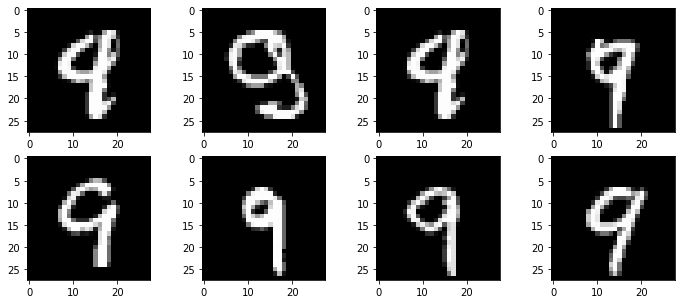

In [ ]:
plt.figure(figsize = (12,5))
for i in range(8):
  ind = random.randint(0, 99)
  plt.subplot(240+1+i)
  plt.imshow(np.reshape(x_extr_l[ind],(28,28)), cmap='gray')

Algorithm 1: ZSCG

In [ ]:
n = 50 # numbers of images

# all images
x_extr ,y_extr = extract_all_images(test_x_clean, test_y_clean, n)

# only nine
lab = 9
x_extr_l, y_extr_l = extract_sample_images(test_x_clean, test_y_clean, n, lab)

nu = [1e-1, 1e-3, 1e-5] # experiments for v
alpha_ = [1e-1, 1e-2, 1e-3] # experimets for alpha
asr= []
asr_l= []
x_ZSGC_gridsearch= []
x_ZSGC_l_gridsearch= []

epochs = 20

loss_ZSGC_0 = 1000
i_ZSGC_0 = 0
j_ZSGC_0 = 0

loss_ZSGC_l_0 = 1000
i_ZSGC_l_0 = 0
j_ZSGC_l_0 = 0

for i in nu:
  for j in alpha_: 
    print(f'tryng with v= {i} alpha= {j} ...')
    loss_ZSGC, x_ZSGC, p_ZSGC, d_ZSGC = ZSCG(x= x_extr, y_true = y_extr, K = 20 , d =  784, epsilon = 0.1,m_k= 30, v= i ,alpha= j , verbose=False, clip=0)
    loss_ZSGC_l, x_ZSGC_l, p_ZSGC_l, d_ZSGC_l = ZSCG(x= x_extr_l, y_true = y_extr_l, K = 20, d = 784, epsilon = 0.1,m_k= 30, v= i ,alpha= j , verbose=False, clip=0)

    x_ZSGC_gridsearch.append(x_ZSGC)
    x_ZSGC_l_gridsearch.append(x_ZSGC_l)

    if loss_ZSGC[-1] < loss_ZSGC_0 :
      loss_ZSGC_0 = loss_ZSGC[-1] # update the loss
      i_ZSGC_0 , j_ZSGC_0 = i, j # update the hyperpar

    if loss_ZSGC_l[-1] < loss_ZSGC_l_0 :
      loss_ZSGC_l_0 = loss_ZSGC_l[-1] # update the loss
      i_ZSGC_l_0 , j_ZSGC_l_0 = i, j # update the hyperpar


print(f"The best hyperparamiters for ZSCG for all images are \n\t v= {i_ZSGC_0}, alpha= {j_ZSGC_0} \n\t Loss = {loss_ZSGC_0} ")
print(f"The best hyperparamiters for ZSCG for one label are \n\t v= {i_ZSGC_l_0}, alpha= {j_ZSGC_l_0} \n\t Loss = {loss_ZSGC_l_0} ")


alpha_ = [1e-1, 1e-2, 1e-3, 1e-1, 1e-2, 1e-3, 1e-1, 1e-2, 1e-3]
v_ = [1e-1, 1e-1, 1e-1, 1e-3, 1e-3, 1e-3, 1e-5, 1e-5, 1e-5]

for i in range(len(alpha_)) :
  asr.append(misclassify_pred(x_ZSGC_gridsearch[i],y_extr))
  asr_l.append(misclassify_pred(x_ZSGC_l_gridsearch[i],y_extr_l))

table = {'Alpha': alpha_, 'V': v_, 'ASR MIX (%)': asr, 'ASR ONE LAB (%)': asr_l}
print('Distortion: 0.1')
print(tabulate(table, headers='keys', tablefmt='grid'))


tryng with v= 0.1 alpha= 0.1 ...
Final loss for ZSCG:  0.00361
Final loss for ZSCG:  0.00351
tryng with v= 0.1 alpha= 0.01 ...
Final loss for ZSCG:  0.00577
Final loss for ZSCG:  0.00542
tryng with v= 0.1 alpha= 0.001 ...
Final loss for ZSCG:  0.00626
Final loss for ZSCG:  0.00633
tryng with v= 0.001 alpha= 0.1 ...
Final loss for ZSCG:  0.00235
Final loss for ZSCG:  0.00277
tryng with v= 0.001 alpha= 0.01 ...
Final loss for ZSCG:  0.00516
Final loss for ZSCG:  0.00479
tryng with v= 0.001 alpha= 0.001 ...
Final loss for ZSCG:  0.00617
Final loss for ZSCG:  0.00629
tryng with v= 1e-05 alpha= 0.1 ...
Final loss for ZSCG:  0.00235
Final loss for ZSCG:  0.00287
tryng with v= 1e-05 alpha= 0.01 ...
Final loss for ZSCG:  0.005
Final loss for ZSCG:  0.00488
tryng with v= 1e-05 alpha= 0.001 ...
Final loss for ZSCG:  0.00617
Final loss for ZSCG:  0.00624
The best hyperparamiters for ZSCG for all images are 
	 v= 1e-05, alpha= 0.1 
	 Loss = 0.002349665015935898 
The best hyperparamiters for ZSCG f


trying with n= 32 q= 1 ...
Final loss for ZSCG:  23.44656
the loss using 32 samples and 1 random dimension is 23.4466
it needed 2.408 seconds per epoch

--------------------------

trying with n= 32 q= 2 ...
Final loss for ZSCG:  23.34956
the loss using 32 samples and 2 random dimension is 23.3496
it needed 2.455 seconds per epoch

--------------------------

trying with n= 32 q= 4 ...
Final loss for ZSCG:  23.03554
the loss using 32 samples and 4 random dimension is 23.0355
it needed 2.275 seconds per epoch

--------------------------

trying with n= 32 q= 10 ...
Final loss for ZSCG:  22.65406
the loss using 32 samples and 10 random dimension is 22.6541
it needed 2.298 seconds per epoch

--------------------------

trying with n= 32 q= 15 ...
Final loss for ZSCG:  22.53612
the loss using 32 samples and 15 random dimension is 22.5361
it needed 3.097 seconds per epoch

--------------------------

trying with n= 32 q= 30 ...
Final loss for ZSCG:  21.84771
the loss using 32 samples and 3

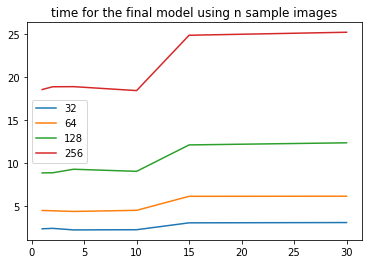

In [ ]:
# ZSCG time test
# n = []
# q = []

# import time module
import time

epochs= 20

q_list = [1, 2, 4, 10, 15, 30] # number of random directions
qn= len(q_list)
n_list= [32, 64, 128, 256] # number of sample

all_times = []
all_loss = []

i_ZSGC_0 = 0.001
j_ZSGC_0 = 0.1

for n in n_list:
  for q in q_list:
    print(f'\ntrying with n= {n} q= {q} ...')
    if q == 'teor' : q = int(np.sqrt(n))
    x_extr ,y_extr = extract_all_images(test_x_clean,test_y_clean,n)
    start = time.perf_counter()
    loss_ZSGC, x_ZSGC, p_ZSGC, d_ZSGC = ZSCG(epochs, 784, epsilon = 0.1, m_k= q, x= x_extr, y_true = y_extr,v= i_ZSGC_0 ,alpha= j_ZSGC_0 , verbose=False, clip=1)
    end = time.perf_counter()
    time_ = (end - start) / epochs
    print( f'the loss using {n} samples and {q} random dimension is {round(loss_ZSGC[-1],4)}\nit needed {round(time_,3)} seconds per epoch\n')
    print('--------------------------')
    all_times.append(time_)
    all_loss.append(loss_ZSGC[-1])

loss_32 = all_loss[:6]
loss_64 = all_loss[6:12]
loss_128 = all_loss[12:36]
loss_256 = all_loss[36:]

for i in range(len(n_list)):
  plt.plot(q_list, all_times[qn*i:qn*i+qn])
  plt.title('time for the final model using n sample images')
  plt.legend(n_list, loc='best')

In [ ]:
'''
Result of the test

n = 32
q	  loss
1	  23.4466
2	  23.3496
4	  23.0355
10	22.6541
15	22.5361
30	21.8477

n = 64
q 	loss
1	  23.1779
2	  23.1112
4 	22.9021
10	22.3504
15	22.2759
30 	21.1695

n = 128
q	  loss
1	  23.0007
2	  22.8613
4	  22.6687
10	21.9131
15	21.4952
30	20.6888

n = 256
q	  loss
1	  21.9089
2	  21.7522
4	  21.3321
10	20.7494
15	20.005
30 	18.8878

'''

Algorithm 2: FZFW

In [ ]:
# for all images clip = 1
mu = [1e-1, 1e-2, 1e-3, 1e-5]
gamma = [1e-1, 1e-2, 1e-3, 1e-5]

loss_FZFW_gridsearch = []
x_FZFW_gridsearch = []
epochs = 25
for i in gamma:
  for j in mu:
    print("FZFW for all labels with gamma =", i, "and mu =", j)
    loss_FZFW, x_FZFW, p_FZFW, d_FZFW = FZFW(x_extr, y_extr, 784, epochs, n, 0.1, -1, gamma = i, mu = j, clip = 1, verbose = False)
    loss_FZFW_gridsearch.append(loss_FZFW)
    x_FZFW_gridsearch.append(x_FZFW)

# gamma and mu are inverted in the output below (correct in the code)
# 3 best parameters
# gamma = 0.1 ; mu = 0.1 ;    Loss FZFW :  15.70134
# gamma = 0.1 ; mu = 0.01  ;   Loss FZFW :  17.26917
# gamma = 0.1 ; mu = 0.001 ;  Loss FZFW :  17.26143

In [ ]:
# TOP-3 parameters
gamma = 0.1
mu = [1e-1, 1e-2, 1e-3]

loss_FZFW_gridsearch = []
x_FZFW_gridsearch = []
epochs = 25
for j in mu:
  print("FZFW for all labels with gamma =", gamma, "and mu =", j)
  loss_FZFW, x_FZFW, p_FZFW, d_FZFW = FZFW(x_extr, y_extr, 784, epochs, n, 0.1, -1, gamma = gamma, mu = j, clip = 1, verbose = False)
  loss_FZFW_gridsearch.append(loss_FZFW)
  x_FZFW_gridsearch.append(x_FZFW)

FZFW for all labels with gamma = 0.1 and mu = 0.1
Final loss for FZFW:  16.55889
FZFW for all labels with gamma = 0.1 and mu = 0.01
Final loss for FZFW:  18.16932
FZFW for all labels with gamma = 0.1 and mu = 0.001
Final loss for FZFW:  18.32724


In [ ]:
mu = [1e-1, 1e-2, 1e-3]
gamma = [0.1, 0.1, 0.1]
asr = []
for i in range(len(mu)):
  asr.append(misclassify_pred(x_FZFW_gridsearch[i],y_extr))

table = {'Gamma': gamma, 'Mu': mu, 'ASR (%)': asr}
print('Distortion: 0.1')
print(tabulate(table, headers='keys', tablefmt='grid'))

Distortion: 0.1
+---------+-------+-----------+
|   Gamma |    Mu |   ASR (%) |
+=========+=======+===========+
|     0.1 | 0.1   |         0 |
+---------+-------+-----------+
|     0.1 | 0.01  |         0 |
+---------+-------+-----------+
|     0.1 | 0.001 |         2 |
+---------+-------+-----------+


In [ ]:
# For only one label clip = 1
gamma = [1e-1, 1e-2]
mu = [1e-1, 1e-2, 1e-3, 1e-5]

loss_FZFW_gridsearch_l = []
x_FZFW_gridsearch_l = []
epochs = 25
for i in gamma:
  for j in mu:
    print("FZFW for only one label with gamma =", i, "and mu =", j)
    loss_FZFW_l, x_FZFW_l, p_FZFW_l, d_FZFW_l = FZFW(x_extr_l, y_extr_l, 784, epochs, n, 0.1, -1, gamma = i, mu = j, clip = 1, verbose = False)
    loss_FZFW_gridsearch_l.append(loss_FZFW_l)
    x_FZFW_gridsearch_l.append(x_FZFW_l)
# gamma and mu are inverted in the output below (correct in the code)
# 3 best parameters
# gamma = 0.1 ; mu = 0.1 ;    Loss FZFW :  5.4366
# gamma = 0.1 ; mu = 0.01 ;   Loss FZFW :  6.1797
# gamma = 0.1 ; mu = 0.001 ;  Loss FZFW :  6.15426

In [ ]:
# TOP-3 parameters
gamma = 0.1
mu = [1e-1, 1e-2, 1e-3]

loss_FZFW_gridsearch_l = []
x_FZFW_gridsearch_l = []
epochs = 25
for j in mu:
  print("FZFW for all labels with gamma =", gamma, "and mu =", j)
  loss_FZFW_l, x_FZFW_l, p_FZFW_l, d_FZFW_l = FZFW(x_extr_l, y_extr_l, 784, epochs, n, 0.1, -1, gamma = gamma, mu = j, clip = 1, verbose = False)
  loss_FZFW_gridsearch_l.append(loss_FZFW_l)
  x_FZFW_gridsearch_l.append(x_FZFW_l)

FZFW for all labels with gamma = 0.1 and mu = 0.1
Final loss for FZFW:  5.42915
FZFW for all labels with gamma = 0.1 and mu = 0.01
Final loss for FZFW:  6.22476
FZFW for all labels with gamma = 0.1 and mu = 0.001
Final loss for FZFW:  6.70679


In [ ]:
mu = [1e-1, 1e-2, 1e-3]
gamma = [0.1, 0.1, 0.1]
asr = []
for i in range(len(mu)):
  asr.append(misclassify_pred(x_FZFW_gridsearch_l[i],y_extr_l))

table = {'Gamma': gamma, 'Mu': mu, 'ASR (%)': asr}
print('Distortion: 0.1')
print(tabulate(table, headers='keys', tablefmt='grid'))

Distortion: 0.1
+---------+-------+-----------+
|   Gamma |    Mu |   ASR (%) |
+=========+=======+===========+
|     0.1 | 0.1   |         8 |
+---------+-------+-----------+
|     0.1 | 0.01  |         4 |
+---------+-------+-----------+
|     0.1 | 0.001 |         6 |
+---------+-------+-----------+


Analysis FZFW q vs n comparison time

In [ ]:
epochs = 20
epsilon = 0.1
n = [36, 64, 144]
iter_grad = [1, 2, 5]
loss_FZFW_all = []
time_all = []
for i in n:
  l = 9
  x_extr_l ,y_extr_l = extract_sample_images(test_x_clean, test_y_clean, i, l)
  for q in iter_grad:
    start_time = time.time()
    loss_FZFW, x_FZFW, p_FZFW, _ = FZFW(x_extr_l, y_extr_l, 784, epochs, i, epsilon, q, gamma = 0.1, mu = 0.1, clip = 0, verbose = False)
    time_i = time.time() - start_time
    time_all.append(time_i)
    loss_FZFW_all.append(loss_FZFW)
    print('n = ',i,' q = ',q)
    print('Time required: ', np.round(time_i,2),' seconds')
    print('---------------------')




Algorithm 3: FZCGS

In [ ]:
# for all images clip = 1
gamma_f = 1e-1
mu = [1e-1, 1e-3]
eta = [1e-1, 1e-2, 1e-4, 1e-6]
loss_FZCGS_gridsearch = []
x_FZCGS_gridsearch = []
epochs = 25

for j in mu:
  for k in eta:
    print("FZCGS for all labels with gamma =", gamma_f, "; mu =", j, "; eta =", k)
    loss_FZCGS, x_FZCGS, p_FZCGS, d_FZCGS = FZCGS(x_extr, y_extr, 784, epochs, n, 0.1, eta = k, q = -1, gamma = gamma_f, mu = j, clip = 1, verbose = False)
    loss_FZCGS_gridsearch.append(loss_FZCGS)
    x_FZCGS_gridsearch.append(x_FZCGS)


FZCGS for all labels with gamma = 0.1 ; mu = 0.1 ; eta = 0.1
Final loss for FZCGS:  15.97494
FZCGS for all labels with gamma = 0.1 ; mu = 0.1 ; eta = 0.01
Final loss for FZCGS:  16.40633
FZCGS for all labels with gamma = 0.1 ; mu = 0.1 ; eta = 0.0001
Final loss for FZCGS:  15.60331
FZCGS for all labels with gamma = 0.1 ; mu = 0.1 ; eta = 1e-06
Final loss for FZCGS:  16.04566
FZCGS for all labels with gamma = 0.1 ; mu = 0.001 ; eta = 0.1
Final loss for FZCGS:  17.45947
FZCGS for all labels with gamma = 0.1 ; mu = 0.001 ; eta = 0.01
Final loss for FZCGS:  17.46471
FZCGS for all labels with gamma = 0.1 ; mu = 0.001 ; eta = 0.0001
Final loss for FZCGS:  17.44267
FZCGS for all labels with gamma = 0.1 ; mu = 0.001 ; eta = 1e-06
Final loss for FZCGS:  17.09795


In [ ]:
mu = [1e-1, 1e-1, 1e-1, 1e-1, 1e-3, 1e-3, 1e-3, 1e-3]
gamma = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
eta = [1e-1, 1e-2, 1e-4, 1e-6, 1e-1, 1e-2, 1e-4, 1e-6]
asr = []
for i in range(len(mu)):
  asr.append(misclassify_pred(x_FZCGS_gridsearch[i],y_extr))

table = {'Gamma': gamma, 'Mu': mu, 'Eta': eta, 'ASR (%)': asr}
print('Distortion: 0.1')
print(tabulate(table, headers='keys', tablefmt='grid'))

Distortion: 0.1
+---------+-------+--------+-----------+
|   Gamma |    Mu |    Eta |   ASR (%) |
+=========+=======+========+===========+
|     0.1 | 0.1   | 0.1    |         0 |
+---------+-------+--------+-----------+
|     0.1 | 0.1   | 0.01   |         2 |
+---------+-------+--------+-----------+
|     0.1 | 0.1   | 0.0001 |         0 |
+---------+-------+--------+-----------+
|     0.1 | 0.1   | 1e-06  |         0 |
+---------+-------+--------+-----------+
|     0.1 | 0.001 | 0.1    |         0 |
+---------+-------+--------+-----------+
|     0.1 | 0.001 | 0.01   |         0 |
+---------+-------+--------+-----------+
|     0.1 | 0.001 | 0.0001 |         0 |
+---------+-------+--------+-----------+
|     0.1 | 0.001 | 1e-06  |         0 |
+---------+-------+--------+-----------+


In [ ]:
# for only one label 
gamma_f = 1e-1
mu = [1e-1, 1e-2, 1e-3]
eta = [1e-1, 1e-2, 1e-4]

loss_FZCGS_gridsearch_l = []
x_FZCGS_gridsearch_l = []
epochs = 25
for j in mu:
  for k in eta:
    print("FZCGS for only one label with gamma =", gamma_f, "; mu =", j, "; eta =", k)
    loss_FZCGS_l, x_FZCGS_l, p_FZCGS_l, d_FZCGS_l = FZCGS(x_extr_l, y_extr_l, 784, epochs, n, 0.1, eta = k, q = -1, gamma = gamma_f, mu = j, clip = 1, verbose = False)
    loss_FZCGS_gridsearch_l.append(loss_FZCGS_l)
    x_FZCGS_gridsearch_l.append(x_FZCGS_l)


FZCGS for only one label with gamma = 0.1 ; mu = 0.1 ; eta = 0.1
Final loss for FZCGS:  5.23807
FZCGS for only one label with gamma = 0.1 ; mu = 0.1 ; eta = 0.01
Final loss for FZCGS:  5.26348
FZCGS for only one label with gamma = 0.1 ; mu = 0.1 ; eta = 0.0001
Final loss for FZCGS:  5.53857
FZCGS for only one label with gamma = 0.1 ; mu = 0.01 ; eta = 0.1
Final loss for FZCGS:  6.5087
FZCGS for only one label with gamma = 0.1 ; mu = 0.01 ; eta = 0.01
Final loss for FZCGS:  6.55971
FZCGS for only one label with gamma = 0.1 ; mu = 0.01 ; eta = 0.0001
Final loss for FZCGS:  6.34354
FZCGS for only one label with gamma = 0.1 ; mu = 0.001 ; eta = 0.1
Final loss for FZCGS:  6.33052
FZCGS for only one label with gamma = 0.1 ; mu = 0.001 ; eta = 0.01
Final loss for FZCGS:  6.83843
FZCGS for only one label with gamma = 0.1 ; mu = 0.001 ; eta = 0.0001
Final loss for FZCGS:  6.79776


In [ ]:
mu = [1e-1, 1e-1, 1e-1, 1e-2, 1e-2, 1e-2, 1e-3, 1e-3, 1e-3]
gamma = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
eta = [1e-1, 1e-2, 1e-4, 1e-1, 1e-2, 1e-4, 1e-1, 1e-2, 1e-4]
asr = []
for i in range(len(mu)):
  asr.append(misclassify_pred(x_FZCGS_gridsearch_l[i],y_extr_l))

table = {'Gamma': gamma, 'Mu': mu, 'Eta': eta, 'ASR (%)': asr}
print('Distortion: 0.1')
print(tabulate(table, headers='keys', tablefmt='grid'))

Distortion: 0.1
+---------+-------+--------+-----------+
|   Gamma |    Mu |    Eta |   ASR (%) |
+=========+=======+========+===========+
|     0.1 | 0.1   | 0.1    |         8 |
+---------+-------+--------+-----------+
|     0.1 | 0.1   | 0.01   |         8 |
+---------+-------+--------+-----------+
|     0.1 | 0.1   | 0.0001 |         4 |
+---------+-------+--------+-----------+
|     0.1 | 0.01  | 0.1    |         4 |
+---------+-------+--------+-----------+
|     0.1 | 0.01  | 0.01   |         2 |
+---------+-------+--------+-----------+
|     0.1 | 0.01  | 0.0001 |         4 |
+---------+-------+--------+-----------+
|     0.1 | 0.001 | 0.1    |         6 |
+---------+-------+--------+-----------+
|     0.1 | 0.001 | 0.01   |         6 |
+---------+-------+--------+-----------+
|     0.1 | 0.001 | 0.0001 |         4 |
+---------+-------+--------+-----------+


## Final model all labels

In [25]:
# exctract data
n = 100 # numbers of images
# all images
x_extr ,y_extr = extract_all_images(test_x_clean, test_y_clean, n)


In [26]:
# final model for example of different class with the hyperparameters found before
epochs = 125
epsilon = 0.1

# m_k equal to 30

loss_ZSGC_f_all, x_ZSGC_f_all, p_ZSGC_f_all, _ = ZSCG(x_extr, y_extr, epochs, 784, epsilon, m_k = 30, v= 1e-5 ,alpha = 0.1, verbose=False, clip = 0)
loss_FZFW_f_all, x_FZFW_f_all, p_FZFW_f_all, _ = FZFW(x_extr, y_extr, 784, epochs, n, epsilon, -1, gamma = 0.1, mu = 0.1, clip = 0, verbose = False)
loss_FZCGS_f_all, x_FZCGS_f_all, p_FZCGS_f_all, _ = FZCGS(x_extr, y_extr, 784, epochs, n, epsilon, eta = 0.01, q = -1, gamma = 0.1, mu = 0.1, clip = 0, verbose = False)


Final loss for ZSCG:  17.09661
Final loss for FZFW:  9.51577
Final loss for FZCGS:  9.91583


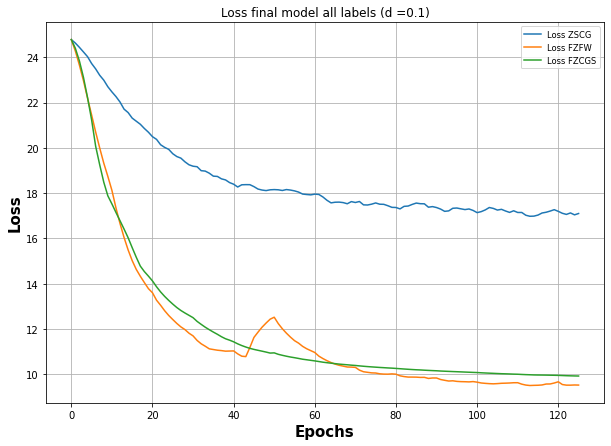

In [27]:
# plot the loss
plot_loss_pert(loss_ZSGC_f_all, loss_FZFW_f_all, loss_FZCGS_f_all, 100, title ='Loss final model all labels (d =0.1)', savefig='final_model_all_class.png', parameters = None)


Plot and save the perturbation

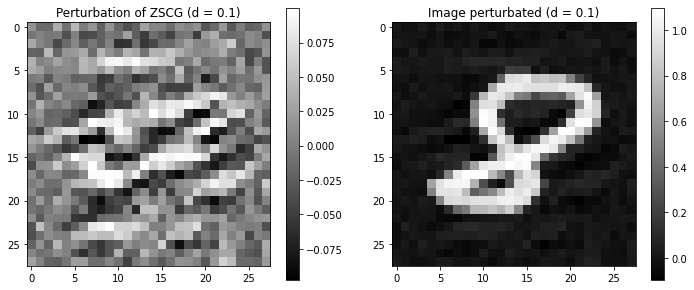

In [28]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Perturbation of ZSCG (d = 0.1)')
plt.imshow(np.reshape(p_ZSGC_f_all[-20],(28,28)), cmap='gray')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title('Image perturbated (d = 0.1)')
plt.imshow(np.reshape(x_ZSGC_f_all[-20],(28,28)), cmap='gray')
plt.colorbar()
plt.savefig('pert_ZSCG_all_lab_d01.png')


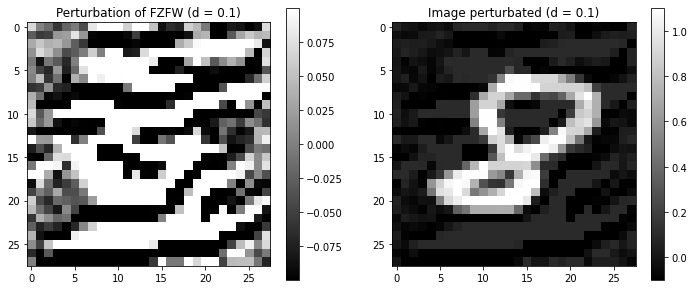

In [29]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Perturbation of FZFW (d = 0.1)')
plt.imshow(np.reshape(p_FZFW_f_all[-20],(28,28)), cmap='gray')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title('Image perturbated (d = 0.1)')
plt.imshow(np.reshape(x_FZFW_f_all[-20],(28,28)), cmap='gray')
plt.colorbar()
plt.savefig('pert_FZFW_all_lab_d01.png')

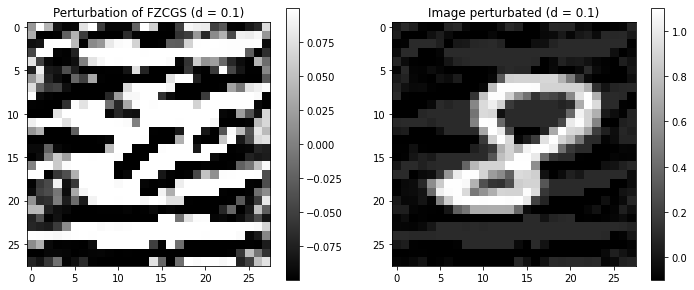

In [30]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Perturbation of FZCGS (d = 0.1)')
plt.imshow(np.reshape(p_FZCGS_f_all[-20],(28,28)), cmap='gray')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title('Image perturbated (d = 0.1)')
plt.imshow(np.reshape(x_FZCGS_f_all[-20],(28,28)), cmap='gray')
plt.colorbar()
plt.savefig('pert_FZCGS_all_lab_d01.png')

In [31]:
# attack succes rate
asr_ZSCG_all_val = misclassify_pred(x_ZSGC_f_all, y_extr)
asr_FZFW_all_val = misclassify_pred(x_FZFW_f_all, y_extr)
asr_FZCGS_all_val = misclassify_pred(x_FZCGS_f_all, y_extr)

In [32]:
model = ['ZSCG', 'FZFW', 'FZCGS']
asr = [asr_ZSCG_all_val, asr_FZFW_all_val, asr_FZCGS_all_val] 
table = {'Model': model, 'ASR (%)': asr}
print('Distortion: 0.1')
print(tabulate(table, headers='keys', tablefmt='grid'))

Distortion: 0.1
+---------+-----------+
| Model   |   ASR (%) |
+=========+===========+
| ZSCG    |         2 |
+---------+-----------+
| FZFW    |         9 |
+---------+-----------+
| FZCGS   |        11 |
+---------+-----------+


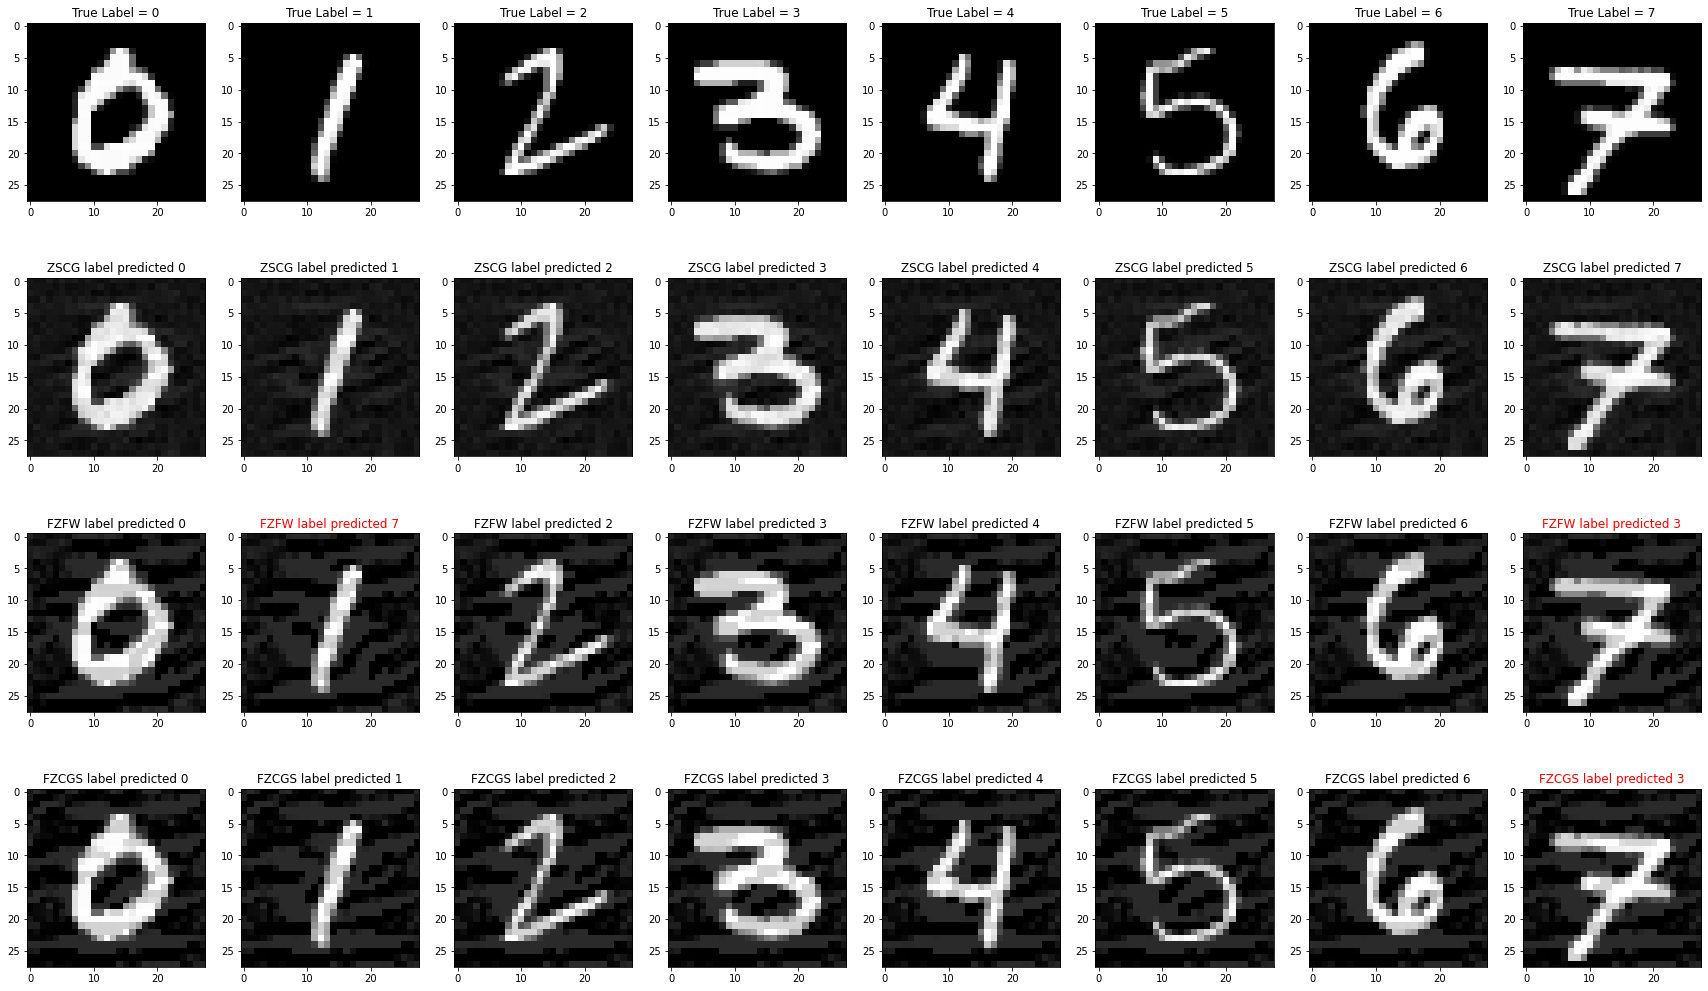

In [33]:
final = {"ZSCG": x_ZSGC_f_all[0:88:11], "FZFW": x_FZFW_f_all[0:88:11], "FZCGS": x_FZCGS_f_all[0:88:11]}
true_label = list(dnn_2.predict(x_extr[0:88:11]).argmax(axis=1))
fig, ax = plt.subplots(4, 8, figsize=(30,18))
for i in range(8):
  ax[0, i].imshow(x_extr[i*11:i*11+1].reshape(28,28), cmap="gray")
  ax[0,i].set_title(f"True Label = {true_label[i]}")
row=0
for alg, data in final.items():
  row += 1
  predicted= dnn_2.predict(data).argmax(axis=1)
  
  for j in range(8):
    color="black"
    ax[row, j].figure
    ax[row, j].imshow(data[j:j+1].reshape(28,28), cmap="gray", )
    if predicted[j] != true_label[j]:
      color="red"
    ax[row, j].set_title(f"{alg} label predicted {predicted[j]}", color=color)


plt.show()

Test the model with the perturbation

In [34]:
# TEST
# exctract data
n_t = 500 # numbers of images to test
# all images
x_extr_t ,y_extr_t = extract_all_images_test(test_x_clean, test_y_clean, n_t)

In [35]:
# add the perturbation
p_ZSCG_f_all_t  = np.tile(p_ZSGC_f_all[1],(n_t,1))
p_FZFW_f_all_t  = np.tile(p_FZFW_f_all[1],(n_t,1))
p_FZCGS_f_all_t = np.tile(p_FZCGS_f_all[1],(n_t,1))

x_ZSCG_t = x_extr_t + p_ZSCG_f_all_t
x_FZFW_t = x_extr_t + p_FZFW_f_all_t
x_FZCGS_t = x_extr_t + p_FZCGS_f_all_t

In [36]:
# attack succes rate
asr_ZSCG_all = misclassify_pred(x_ZSCG_t, y_extr_t)
asr_FZFW_all = misclassify_pred(x_FZFW_t, y_extr_t)
asr_FZCGS_all = misclassify_pred(x_FZCGS_t, y_extr_t)

In [37]:
model = ['ZSCG', 'FZFW', 'FZCGS']
asr = [asr_ZSCG_all, asr_FZFW_all, asr_FZCGS_all] 
table = {'Model': model, 'ASR (%)': asr}
print('Distortion: 0.1')
print(tabulate(table, headers='keys', tablefmt='grid'))

Distortion: 0.1
+---------+-----------+
| Model   |   ASR (%) |
+=========+===========+
| ZSCG    |       0.6 |
+---------+-----------+
| FZFW    |       5   |
+---------+-----------+
| FZCGS   |       4.2 |
+---------+-----------+


Distortion = 0.3

In [ ]:
# exctract data
n = 100 # numbers of images
# all images
x_extr ,y_extr = extract_all_images(test_x_clean, test_y_clean, n)


In [ ]:
# final model for example of different class with the hyperparameters found before
epochs = 150
epsilon = 0.3
# m_k equal to 30
loss_ZSGC_f_all, x_ZSGC_f_all, p_ZSGC_f_all, _ = ZSCG(x_extr, y_extr, epochs, 784, epsilon, m_k = 30, v= 1e-5 ,alpha = 0.1, verbose=False, clip = 0)
loss_FZFW_f_all, x_FZFW_f_all, p_FZFW_f_all, _ = FZFW(x_extr, y_extr, 784, epochs, n, epsilon, -1, gamma = 0.1, mu = 0.1, clip = 0, verbose = False)
loss_FZCGS_f_all, x_FZCGS_f_all, p_FZCGS_f_all, _ = FZCGS(x_extr, y_extr, 784, epochs, n, epsilon, eta = 0.01, q = -1, gamma = 0.1, mu = 0.1, clip = 0, verbose = False)


Final loss for ZSCG:  4.2295
Final loss for FZFW:  5.17642
Final loss for FZCGS:  0.7457


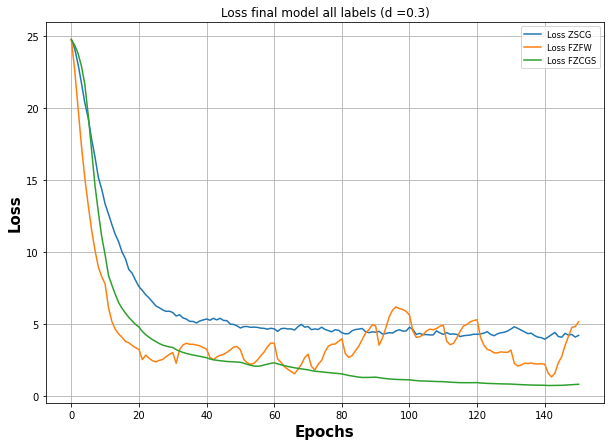

In [ ]:
# plot the loss
plot_loss_pert(loss_ZSGC_f_all, loss_FZFW_f_all, loss_FZCGS_f_all, 150, title ='Loss final model all labels (d =0.3)', savefig='final_model_all_class_d_0.3.png', parameters = None)


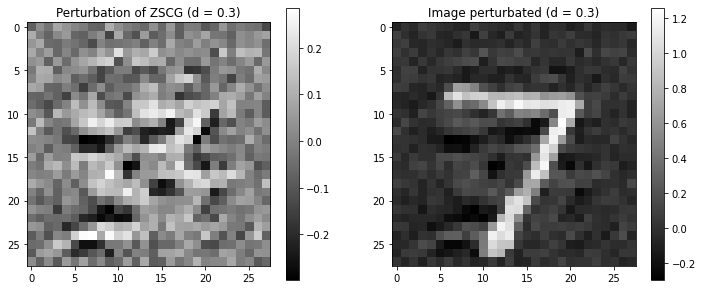

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Perturbation of ZSCG (d = 0.3)')
plt.imshow(np.reshape(p_ZSGC_f_all[-30],(28,28)), cmap='gray')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title('Image perturbated (d = 0.3)')
plt.imshow(np.reshape(x_ZSGC_f_all[-30],(28,28)), cmap='gray')
plt.colorbar()
plt.savefig('pert_ZSCG_all_lab_d03.png')

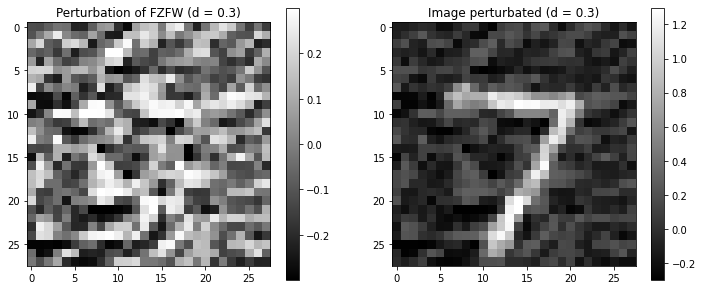

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Perturbation of FZFW (d = 0.3)')
plt.imshow(np.reshape(p_FZFW_f_all[-30],(28,28)), cmap='gray')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title('Image perturbated (d = 0.3)')
plt.imshow(np.reshape(x_FZFW_f_all[-30],(28,28)), cmap='gray')
plt.colorbar()
plt.savefig('pert_FZFW_all_lab_d03.png')

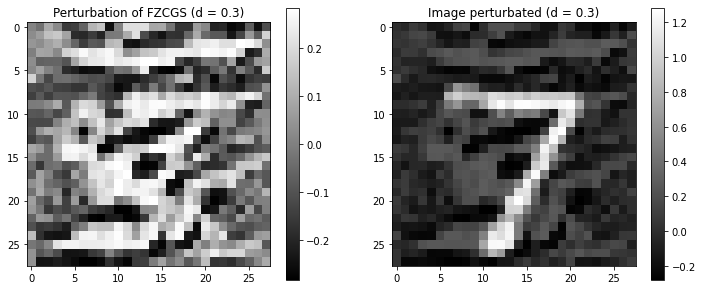

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Perturbation of FZCGS (d = 0.3)')
plt.imshow(np.reshape(p_FZCGS_f_all[-30],(28,28)), cmap='gray')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title('Image perturbated (d = 0.3)')
plt.imshow(np.reshape(x_FZCGS_f_all[-30],(28,28)), cmap='gray')
plt.colorbar()
plt.savefig('pert_FZCGS_all_lab_d03.png')

In [ ]:
# attack succes rate
asr_ZSCG_all_val = misclassify_pred(x_ZSGC_f_all, y_extr)
asr_FZFW_all_val = misclassify_pred(x_FZFW_f_all, y_extr)
asr_FZCGS_all_val = misclassify_pred(x_FZCGS_f_all, y_extr)

In [ ]:
model = ['ZSCG', 'FZFW', 'FZCGS']
asr = [asr_ZSCG_all_val, asr_FZFW_all_val, asr_FZCGS_all_val] 
table = {'Model': model, 'ASR (%)': asr}
print('Distortion: 0.3')
print(tabulate(table, headers='keys', tablefmt='grid'))

Distortion: 0.3
+---------+-----------+
| Model   |   ASR (%) |
+=========+===========+
| ZSCG    |        32 |
+---------+-----------+
| FZFW    |        34 |
+---------+-----------+
| FZCGS   |        64 |
+---------+-----------+


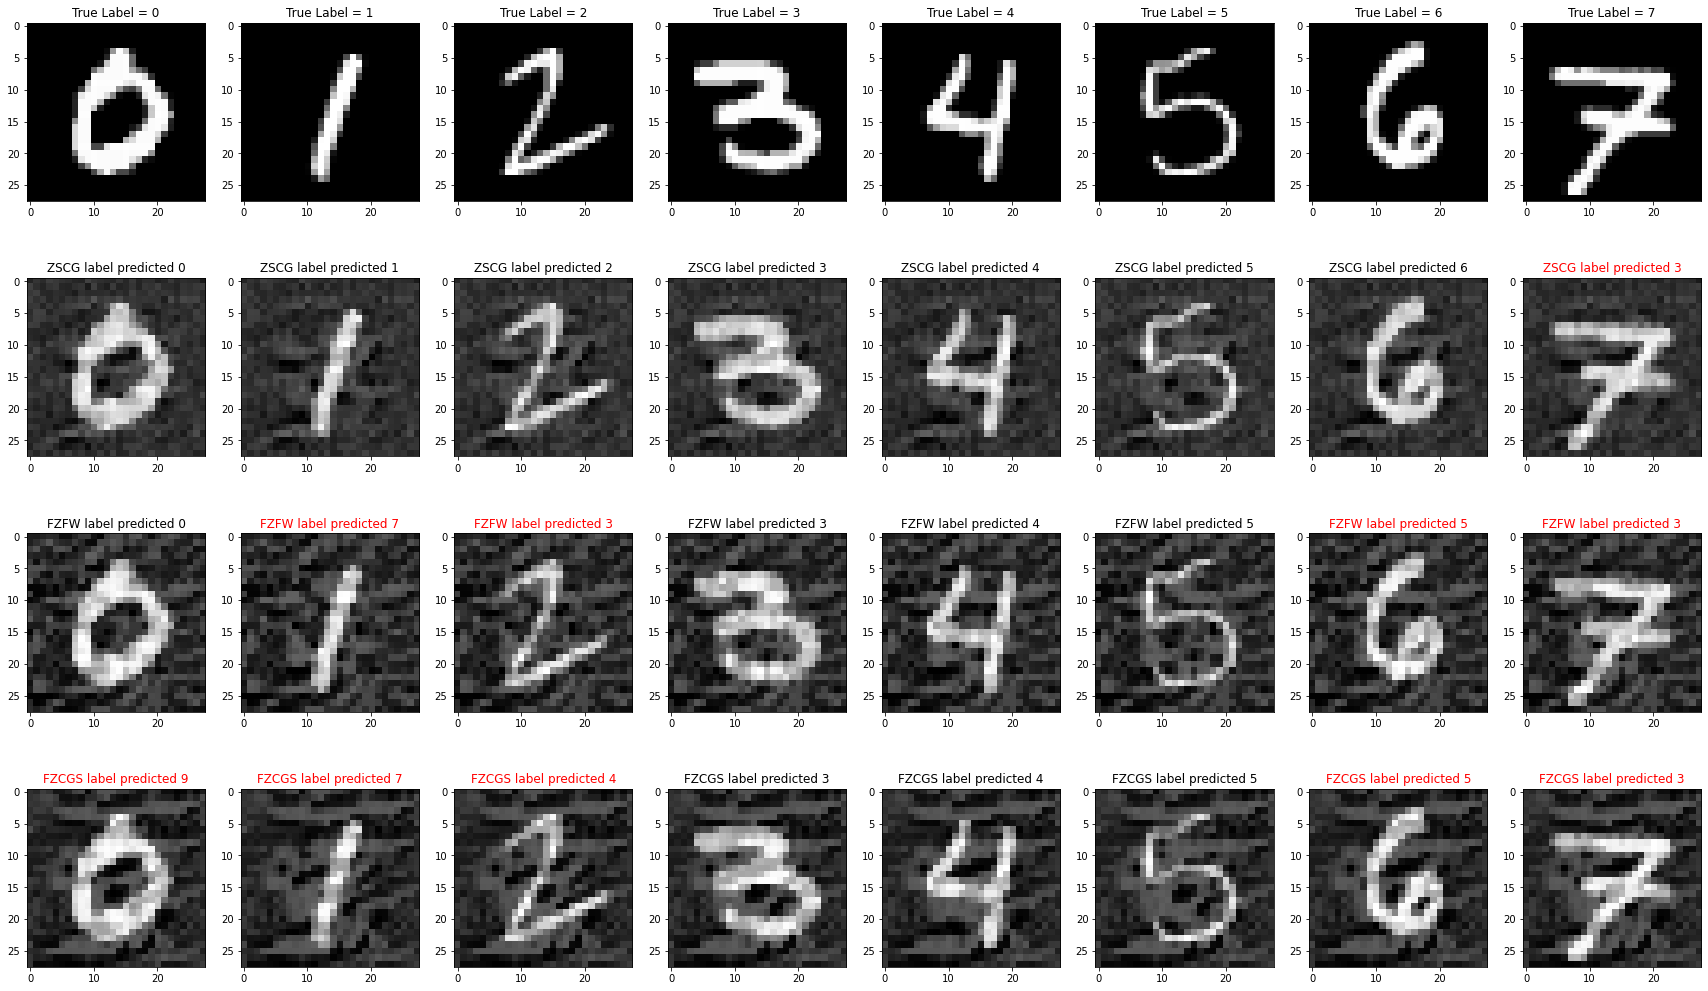

In [ ]:
final = {"ZSCG": x_ZSGC_f_all[0:88:11], "FZFW": x_FZFW_f_all[0:88:11], "FZCGS": x_FZCGS_f_all[0:88:11]}
true_label = list(dnn_2.predict(x_extr[0:88:11]).argmax(axis=1))
fig, ax = plt.subplots(4, 8, figsize=(30,18))
for i in range(8):
  ax[0, i].imshow(x_extr[i*11:i*11+1].reshape(28,28), cmap="gray")
  ax[0,i].set_title(f"True Label = {true_label[i]}")
row=0
for alg, data in final.items():
  row += 1
  predicted= dnn_2.predict(data).argmax(axis=1)
  
  for j in range(8):
    color="black"
    ax[row, j].figure
    ax[row, j].imshow(data[j:j+1].reshape(28,28), cmap="gray", )
    if predicted[j] != true_label[j]:
      color="red"
    ax[row, j].set_title(f"{alg} label predicted {predicted[j]}", color=color)


plt.show()

In [ ]:
# TEST
# exctract data
n_t = 500 # numbers of images to test
# all images
x_extr_t ,y_extr_t = extract_all_images_test(test_x_clean, test_y_clean, n_t)

In [ ]:
# add the perturbation
p_ZSCG_f_all_t  = np.tile(p_ZSGC_f_all[1],(n_t,1))
p_FZFW_f_all_t  = np.tile(p_FZFW_f_all[1],(n_t,1))
p_FZCGS_f_all_t = np.tile(p_FZCGS_f_all[1],(n_t,1))

x_ZSCG_t = x_extr_t + p_ZSCG_f_all_t
x_FZFW_t = x_extr_t + p_FZFW_f_all_t
x_FZCGS_t = x_extr_t + p_FZCGS_f_all_t

In [ ]:
# attack succes rate
asr_ZSCG_all = misclassify_pred(x_ZSCG_t, y_extr_t)
asr_FZFW_all = misclassify_pred(x_FZFW_t, y_extr_t)
asr_FZCGS_all = misclassify_pred(x_FZCGS_t, y_extr_t)

In [ ]:
model = ['ZSCG', 'FZFW', 'FZCGS']
asr = [asr_ZSCG_all, asr_FZFW_all, asr_FZCGS_all] 
table = {'Model': model, 'ASR (%)': asr}
print('Distortion: 0.3')
print(tabulate(table, headers='keys', tablefmt='grid'))

Distortion: 0.3
+---------+-----------+
| Model   |   ASR (%) |
+=========+===========+
| ZSCG    |      18   |
+---------+-----------+
| FZFW    |      28.4 |
+---------+-----------+
| FZCGS   |      37   |
+---------+-----------+


In [ ]:
# error table for FZFW
ZSCG_table = cross_val(x_ZSCG_t, y_extr_t)
# error table for FZFW
FZFW_table = cross_val(x_FZFW_t, y_extr_t)
# error table for FZFW
FZCGS_table = cross_val(x_FZCGS_t, y_extr_t)

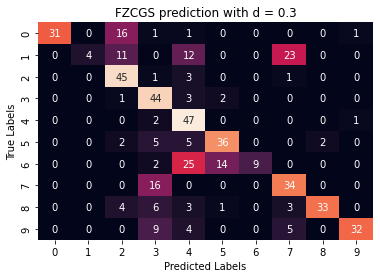

In [ ]:
Index= [0,1,2,3,4,5,6,7,8,9]
df = DataFrame(FZCGS_table, index=Index, columns=Index) 
a = sns.heatmap(df, annot=True, cbar = False)
a = a.set(title = 'FZCGS prediction with d = 0.3',xlabel='Predicted Labels', ylabel='True Labels')


## Final model single label

In [ ]:
# exctract data
n = 100 # numbers of images
l = 9   # label
# all images
x_extr_l ,y_extr_l = extract_sample_images(test_x_clean, test_y_clean, n, l)


In [ ]:
# final model for example of different class with the hyperparameters found before
epochs = 125
epsilon = 0.1

# m_k equal to 30
loss_ZSGC_f_all_l, x_ZSGC_f_all_l, p_ZSGC_f_all_l, _ = ZSCG(x_extr_l, y_extr_l, epochs, 784, epsilon, m_k = 30, v= 1e-5 ,alpha = 0.1, verbose = False, clip = 0)
loss_FZFW_f_all_l, x_FZFW_f_all_l, p_FZFW_f_all_l, _ = FZFW(x_extr_l, y_extr_l, 784, epochs, n, epsilon, -1, gamma = 0.1, mu = 0.1, clip = 0, verbose = False)
loss_FZCGS_f_all_l, x_FZCGS_f_all_l, p_FZCGS_f_all_l, _ = FZCGS(x_extr_l, y_extr_l, 784, epochs, n, epsilon, eta = 0.01, q = -1, gamma = 0.1, mu = 0.1, clip = 0, verbose = False)


Final loss for ZSCG:  3.81851
Final loss for FZFW:  1.45237
Final loss for FZCGS:  1.17955


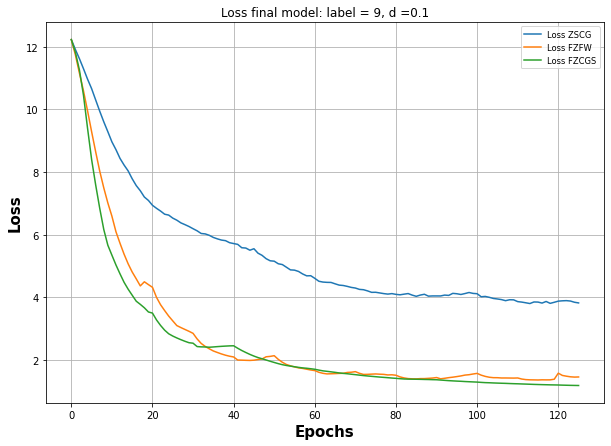

In [ ]:
# plot the loss
plot_loss_pert(loss_ZSGC_f_all_l, loss_FZFW_f_all_l, loss_FZCGS_f_all_l, 125, title ='Loss final model: label = 9, d =0.1', savefig='final_model_nine.png', parameters = None)


Plot and save the perturbation

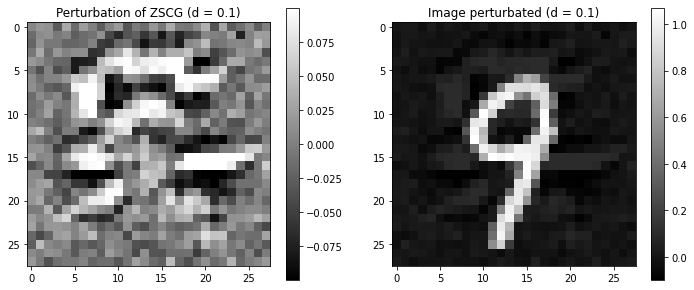

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Perturbation of ZSCG (d = 0.1)')
plt.imshow(np.reshape(p_ZSGC_f_all_l[-1],(28,28)), cmap='gray')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title('Image perturbated (d = 0.1)')
plt.imshow(np.reshape(x_ZSGC_f_all_l[-1],(28,28)), cmap='gray')
plt.colorbar()
plt.savefig('pert_ZSCG_single_lab_d01.png')



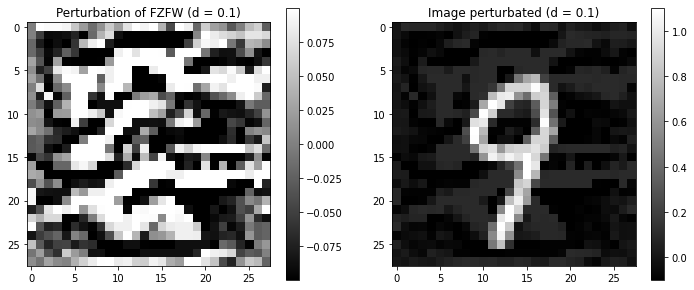

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Perturbation of FZFW (d = 0.1)')
plt.imshow(np.reshape(p_FZFW_f_all_l[-1],(28,28)), cmap='gray')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title('Image perturbated (d = 0.1)')
plt.imshow(np.reshape(x_FZFW_f_all_l[-1],(28,28)), cmap='gray')
plt.colorbar()
plt.savefig('pert_FZFW_single_lab_d01.png')

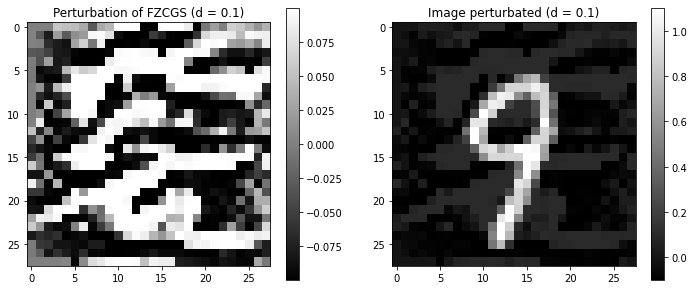

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Perturbation of FZCGS (d = 0.1)')
plt.imshow(np.reshape(p_FZCGS_f_all_l[-1],(28,28)), cmap='gray')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title('Image perturbated (d = 0.1)')
plt.imshow(np.reshape(x_FZCGS_f_all_l[-1],(28,28)), cmap='gray')
plt.colorbar()
plt.savefig('pert_FZCGS_single_lab_d01.png')

In [ ]:
# attack succes rate
asr_ZSCG_l_val = misclassify_pred(x_ZSGC_f_all_l, y_extr_l)
asr_FZFW_l_val = misclassify_pred(x_FZFW_f_all_l, y_extr_l)
asr_FZCGS_l_val = misclassify_pred(x_FZCGS_f_all_l, y_extr_l)

In [ ]:
model = ['ZSCG', 'FZFW', 'FZCGS']
asr = [asr_ZSCG_l_val, asr_FZFW_l_val, asr_FZCGS_l_val] 
table = {'Model': model, 'ASR (%)': asr}
print('Distortion: 0.1')
print(tabulate(table, headers='keys', tablefmt='grid'))

Distortion: 0.1
+---------+-----------+
| Model   |   ASR (%) |
+=========+===========+
| ZSCG    |        22 |
+---------+-----------+
| FZFW    |        44 |
+---------+-----------+
| FZCGS   |        47 |
+---------+-----------+


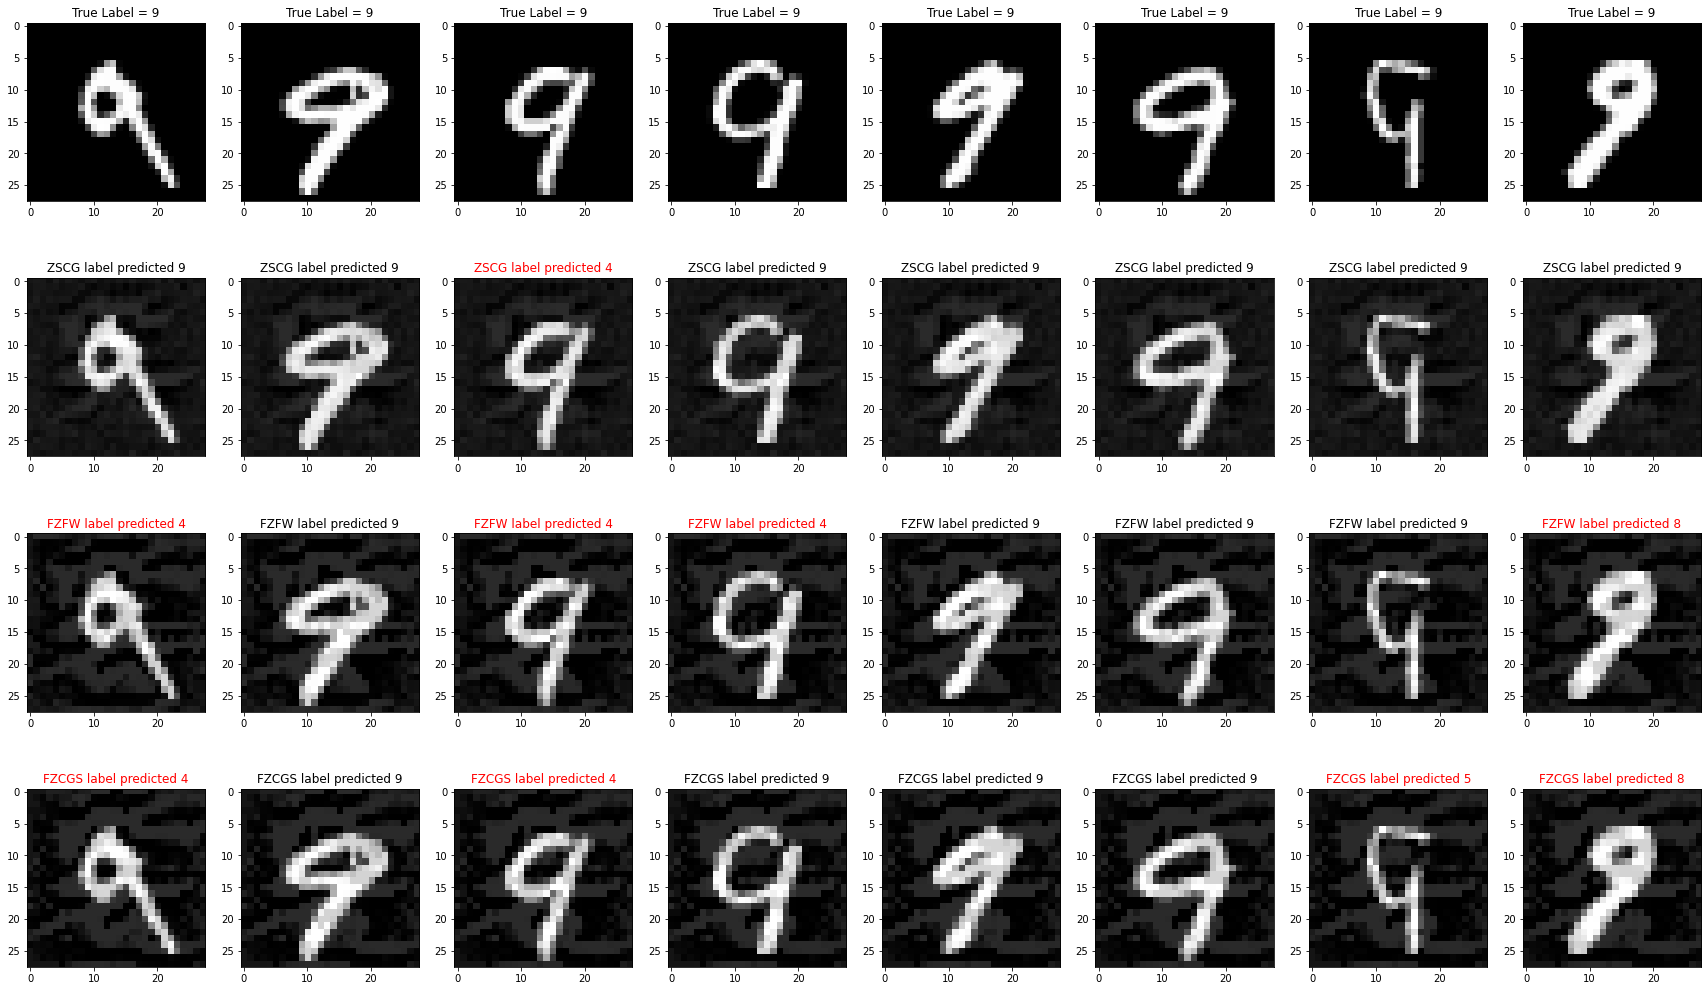

In [ ]:
final = {"ZSCG": x_ZSGC_f_all_l[:8], "FZFW": x_FZFW_f_all_l[:8], "FZCGS": x_FZCGS_f_all_l[:8]}
true_label = list(dnn_2.predict(x_extr_l[:8]).argmax(axis=1))
fig, ax = plt.subplots(4, 8, figsize=(30,18))
for i in range(8):
  ax[0, i].imshow(x_extr_l[i:i+1].reshape(28,28), cmap="gray")
  ax[0,i].set_title(f"True Label = {true_label[i]}")
row=0
for alg, data in final.items():
  row += 1
  predicted= dnn_2.predict(data).argmax(axis=1)
  
  for j in range(8):
    color="black"
    ax[row, j].figure
    ax[row, j].imshow(data[j:j+1].reshape(28,28), cmap="gray", )
    if predicted[j] != true_label[j]:
      color="red"
    ax[row, j].set_title(f"{alg} label predicted {predicted[j]}", color=color)


plt.show()

Test the model with the perturbation

In [ ]:
# TEST
# exctract data
n_t = 500 # numbers of images to test
l = 9
# all images
x_extr_t_l ,y_extr_t_l = extract_sample_images_test(test_x_clean, test_y_clean, n_t, l)

In [ ]:
# add the perturbation
p_ZSCG_f_l_t  = np.tile(p_ZSGC_f_all_l[1],(n_t,1))
p_FZFW_f_l_t  = np.tile(p_FZFW_f_all_l[1],(n_t,1))
p_FZCGS_f_l_t = np.tile(p_FZCGS_f_all_l[1],(n_t,1))

x_ZSCG_t_l  = x_extr_t_l + p_ZSCG_f_l_t
x_FZFW_t_l  = x_extr_t_l + p_FZFW_f_l_t
x_FZCGS_t_l = x_extr_t_l + p_FZCGS_f_l_t

In [ ]:
# attack succes rate
asr_ZSCG_l  = misclassify_pred(x_ZSCG_t_l, y_extr_t_l)
asr_FZFW_l  = misclassify_pred(x_FZFW_t_l, y_extr_t_l)
asr_FZCGS_l = misclassify_pred(x_FZCGS_t_l, y_extr_t_l)

In [ ]:
model = ['ZSCG', 'FZFW', 'FZCGS']
asr = [asr_ZSCG_l, asr_FZFW_l, asr_FZCGS_l] 
table = {'Model': model, 'ASR (%)': asr}
print('Distortion: 0.1')
print(tabulate(table, headers='keys', tablefmt='grid'))

Distortion: 0.1
+---------+-----------+
| Model   |   ASR (%) |
+=========+===========+
| ZSCG    |      15.8 |
+---------+-----------+
| FZFW    |      31.8 |
+---------+-----------+
| FZCGS   |      35.4 |
+---------+-----------+


Distortion = 0.3

In [ ]:
# exctract data
n = 100 # numbers of images
l = 9   # label
# all images
x_extr_l ,y_extr_l = extract_sample_images(test_x_clean, test_y_clean, n, l)


In [ ]:
# final model for example of different class with the hyperparameters found before
epochs = 125
epsilon = 0.3

# m_k equal to 30
loss_ZSGC_f_all_l, x_ZSGC_f_all_l, p_ZSGC_f_all_l, _ = ZSCG(x_extr_l, y_extr_l, epochs, 784, epsilon, m_k = 30, v= 1e-5 ,alpha = 0.1, verbose=False, clip = 0)
loss_FZFW_f_all_l, x_FZFW_f_all_l, p_FZFW_f_all_l, _ = FZFW(x_extr_l, y_extr_l, 784, epochs, n, epsilon, -1, gamma = 0.1, mu = 0.1, clip = 0, verbose = False)
loss_FZCGS_f_all_l, x_FZCGS_f_all_l, p_FZCGS_f_all_l, _ = FZCGS(x_extr_l, y_extr_l, 784, epochs, n, epsilon, eta = 0.01, q = -1, gamma = 0.1, mu = 0.1, clip = 0, verbose = False)


Final loss for ZSCG:  0.13341
Final loss for FZFW:  0.07097
Final loss for FZCGS:  0.00291


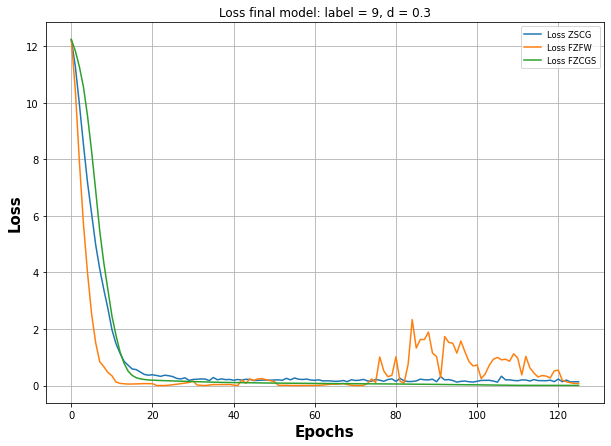

In [ ]:
# plot the loss
plot_loss_pert(loss_ZSGC_f_all_l, loss_FZFW_f_all_l, loss_FZCGS_f_all_l, 100, title ='Loss final model: label = 9, d = 0.3', savefig='final_model_nine_d03.png', parameters = None)


Plot and save the perturbation

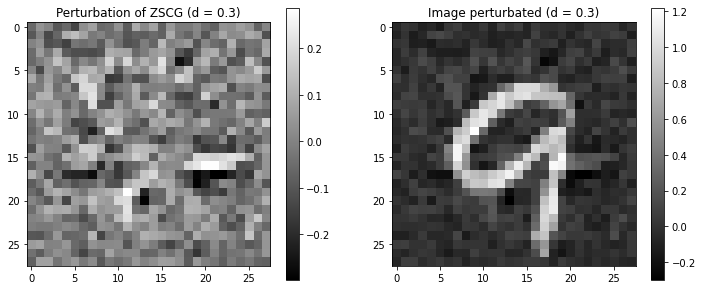

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Perturbation of ZSCG (d = 0.3)')
plt.imshow(np.reshape(p_ZSGC_f_all_l[-2],(28,28)), cmap='gray')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title('Image perturbated (d = 0.3)')
plt.imshow(np.reshape(x_ZSGC_f_all_l[-2],(28,28)), cmap='gray')
plt.colorbar()
plt.savefig('pert_ZSCG_single_lab_d03.png')



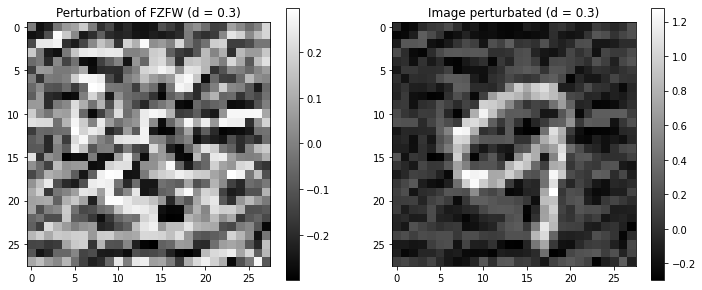

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Perturbation of FZFW (d = 0.3)')
plt.imshow(np.reshape(p_FZFW_f_all_l[-2],(28,28)), cmap='gray')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title('Image perturbated (d = 0.3)')
plt.imshow(np.reshape(x_FZFW_f_all_l[-2],(28,28)), cmap='gray')
plt.colorbar()
plt.savefig('pert_FZFW_single_lab_d03.png')

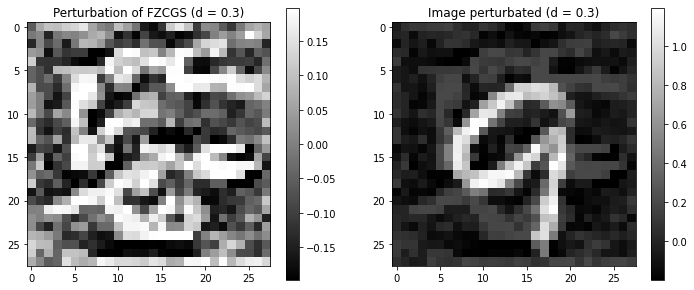

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Perturbation of FZCGS (d = 0.3)')
plt.imshow(np.reshape(p_FZCGS_f_all_l[-2],(28,28)), cmap='gray')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title('Image perturbated (d = 0.3)')
plt.imshow(np.reshape(x_FZCGS_f_all_l[-2],(28,28)), cmap='gray')
plt.colorbar()
plt.savefig('pert_FZCGS_single_lab_d03.png')

In [ ]:
# attack succes rate
asr_ZSCG_l_val = misclassify_pred(x_ZSGC_f_all_l, y_extr)
asr_FZFW_l_val = misclassify_pred(x_FZFW_f_all_l, y_extr)
asr_FZCGS_l_val = misclassify_pred(x_FZCGS_f_all_l, y_extr)

In [ ]:
model = ['ZSCG', 'FZFW', 'FZCGS']
asr = [asr_ZSCG_l_val, asr_FZFW_l_val, asr_FZCGS_l_val] 
table = {'Model': model, 'ASR (%)': asr}
print('Distortion: 0.3')
print(tabulate(table, headers='keys', tablefmt='grid'))

Distortion: 0.3
+---------+-----------+
| Model   |   ASR (%) |
+=========+===========+
| ZSCG    |        91 |
+---------+-----------+
| FZFW    |        91 |
+---------+-----------+
| FZCGS   |        94 |
+---------+-----------+


Test the model with the perturbation

In [ ]:
# TEST
# exctract data
n_t = 500 # numbers of images to test
l = 9
# all images
x_extr_t_l ,y_extr_t_l = extract_sample_images_test(test_x_clean, test_y_clean, n_t, l)

In [ ]:
# add the perturbation
p_ZSCG_f_l_t  = np.tile(p_ZSGC_f_all_l[1],(n_t,1))
p_FZFW_f_l_t  = np.tile(p_FZFW_f_all_l[1],(n_t,1))
p_FZCGS_f_l_t = np.tile(p_FZCGS_f_all_l[1],(n_t,1))

x_ZSCG_t_l  = x_extr_t_l + p_ZSCG_f_l_t
x_FZFW_t_l  = x_extr_t_l + p_FZFW_f_l_t
x_FZCGS_t_l = x_extr_t_l + p_FZCGS_f_l_t

In [ ]:
# attack succes rate
asr_ZSCG_l  = misclassify_pred(x_ZSCG_t_l, y_extr_t_l)
asr_FZFW_l  = misclassify_pred(x_FZFW_t_l, y_extr_t_l)
asr_FZCGS_l = misclassify_pred(x_FZCGS_t_l, y_extr_t_l)

In [ ]:
model = ['ZSCG', 'FZFW', 'FZCGS']
asr = [asr_ZSCG_l, asr_FZFW_l, asr_FZCGS_l] 
table = {'Model': model, 'ASR (%)': asr}
print('Distortion: 0.3')
print(tabulate(table, headers='keys', tablefmt='grid'))

Distortion: 0.3
+---------+-----------+
| Model   |   ASR (%) |
+=========+===========+
| ZSCG    |      69.4 |
+---------+-----------+
| FZFW    |      87.8 |
+---------+-----------+
| FZCGS   |      92.8 |
+---------+-----------+


## Final model clip = True, d=0.1, single label

In [ ]:
# exctract data
n = 100 # numbers of images
l = 9   # label
# all images
x_extr_l ,y_extr_l = extract_sample_images(test_x_clean, test_y_clean, n, l)


In [ ]:
# final model for example of different class with the hyperparameters found before
epochs = 100
epsilon = 0.1

# m_k equal to 30
loss_ZSGC_f_all_l, x_ZSGC_f_all_l, p_ZSGC_f_all_l, _ = ZSCG(x_extr_l, y_extr_l, epochs, 784, epsilon, m_k = 30, v= 1e-5 ,alpha = 0.1, verbose=False, clip = 0)
loss_FZFW_f_all_l, x_FZFW_f_all_l, p_FZFW_f_all_l, _ = FZFW(x_extr_l, y_extr_l, 784, epochs, n, epsilon, -1, gamma = 0.1, mu = 0.1, clip = 1, verbose = False)
loss_FZCGS_f_all_l, x_FZCGS_f_all_l, p_FZCGS_f_all_l, _ = FZCGS(x_extr_l, y_extr_l, 784, epochs, n, epsilon, eta = 0.01, q = -1, gamma = 0.1, mu = 0.1, clip = 1, verbose = False)


Final loss for ZSCG:  7.23162
Final loss for FZFW:  4.0143
Final loss for FZCGS:  4.18357


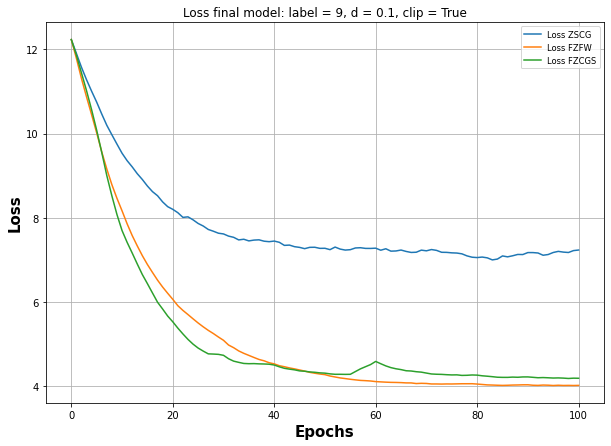

In [ ]:
# plot the loss
plot_loss_pert(loss_ZSGC_f_all_l, loss_FZFW_f_all_l, loss_FZCGS_f_all_l, 100, title ='Loss final model: label = 9, d = 0.1, clip = True', savefig='final_model_nine_d01_CLIP.png', parameters = None)


Plot and save the perturbation

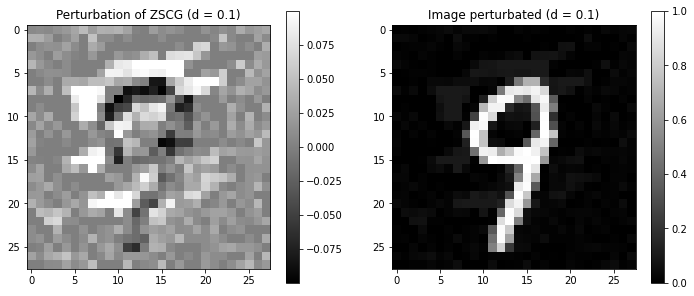

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Perturbation of ZSCG (d = 0.1)')
plt.imshow(np.reshape(p_ZSGC_f_all_l[-1],(28,28)), cmap='gray')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title('Image perturbated (d = 0.1)')
plt.imshow(np.reshape(x_ZSGC_f_all_l[-1],(28,28)), cmap='gray')
plt.colorbar()
plt.savefig('pert_ZSCG_single_lab_d01_CLIP.png')



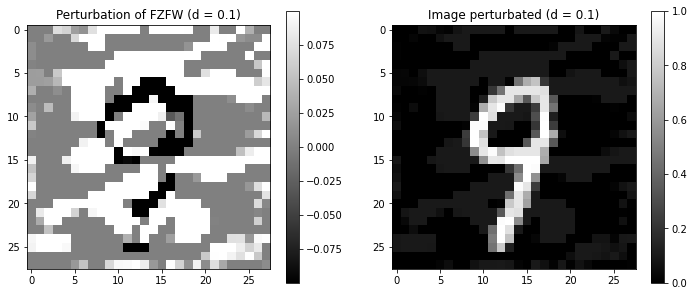

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Perturbation of FZFW (d = 0.1)')
plt.imshow(np.reshape(p_FZFW_f_all_l[-1],(28,28)), cmap='gray')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title('Image perturbated (d = 0.1)')
plt.imshow(np.reshape(x_FZFW_f_all_l[-1],(28,28)), cmap='gray')
plt.colorbar()
plt.savefig('pert_FZFW_single_lab_d01_CLIP.png')

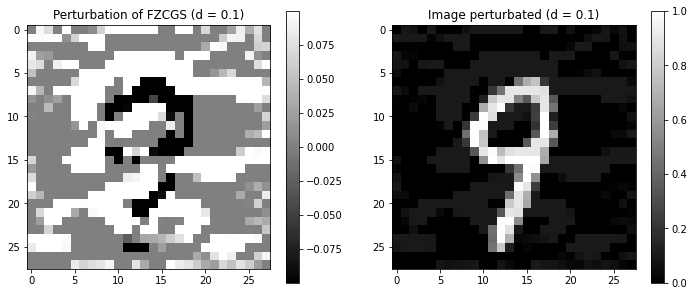

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Perturbation of FZCGS (d = 0.1)')
plt.imshow(np.reshape(p_FZCGS_f_all_l[-1],(28,28)), cmap='gray')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title('Image perturbated (d = 0.1)')
plt.imshow(np.reshape(x_FZCGS_f_all_l[-1],(28,28)), cmap='gray')
plt.colorbar()
plt.savefig('pert_FZCGS_single_lab_d01_CLIP.png')

In [ ]:
# attack succes rate
asr_ZSCG_l_val = misclassify_pred(x_ZSGC_f_all_l, y_extr_l)
asr_FZFW_l_val = misclassify_pred(x_FZFW_f_all_l, y_extr_l)
asr_FZCGS_l_val = misclassify_pred(x_FZCGS_f_all_l, y_extr_l)

In [ ]:
model = ['ZSCG', 'FZFW', 'FZCGS']
asr = [asr_ZSCG_l_val, asr_FZFW_l_val, asr_FZCGS_l_val] 
table = {'Model': model, 'ASR (%)': asr}
print('Distortion: 0.1')
print('Clip: True')
print(tabulate(table, headers='keys', tablefmt='grid'))

Distortion: 0.1
Clip: True
+---------+-----------+
| Model   |   ASR (%) |
+=========+===========+
| ZSCG    |         6 |
+---------+-----------+
| FZFW    |        12 |
+---------+-----------+
| FZCGS   |        12 |
+---------+-----------+


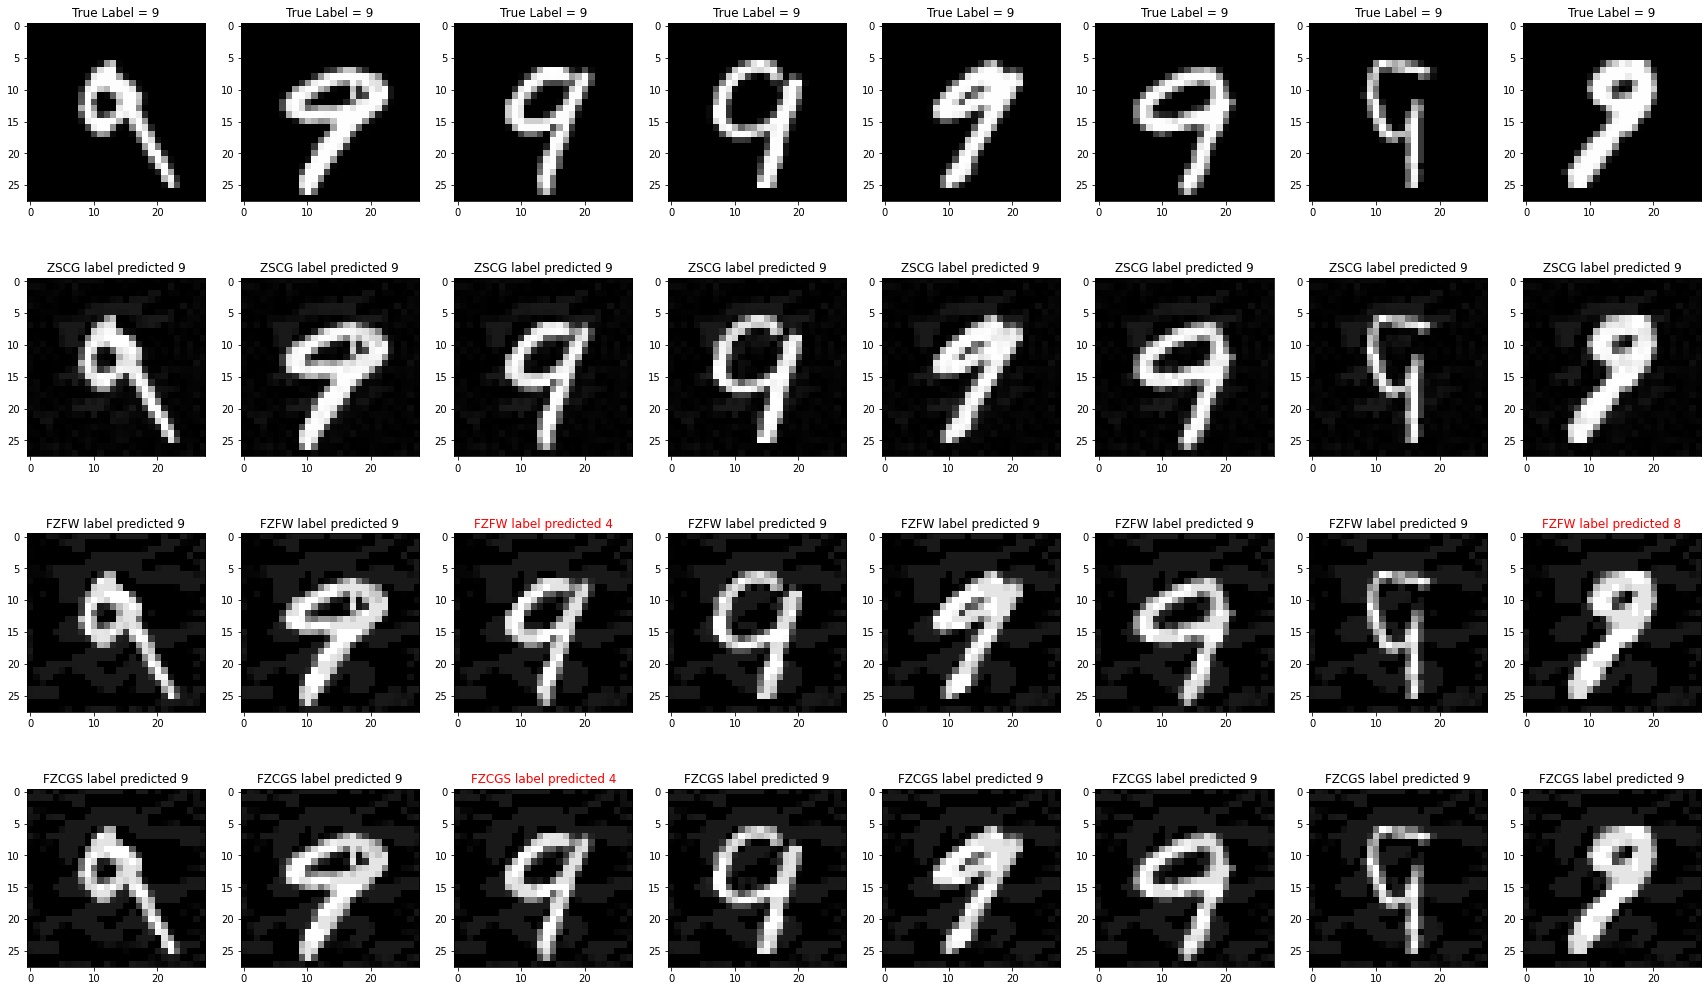

In [ ]:
final = {"ZSCG": x_ZSGC_f_all_l[:8], "FZFW": x_FZFW_f_all_l[:8], "FZCGS": x_FZCGS_f_all_l[:8]}
true_label = list(dnn_2.predict(x_extr_l[:8]).argmax(axis=1))
fig, ax = plt.subplots(4, 8, figsize=(30,18))
for i in range(8):
  ax[0, i].imshow(x_extr_l[i:i+1].reshape(28,28), cmap="gray")
  ax[0,i].set_title(f"True Label = {true_label[i]}")
row=0
for alg, data in final.items():
  row += 1
  predicted= dnn_2.predict(data).argmax(axis=1)
  
  for j in range(8):
    color="black"
    ax[row, j].figure
    ax[row, j].imshow(data[j:j+1].reshape(28,28), cmap="gray", )
    if predicted[j] != true_label[j]:
      color="red"
    ax[row, j].set_title(f"{alg} label predicted {predicted[j]}", color=color)


plt.show()

## Final model clip = True, d=0.1, all labels

In [ ]:
# exctract data
n = 100 # numbers of images
# all images
x_extr ,y_extr = extract_all_images(test_x_clean, test_y_clean, n)


In [ ]:
# final model for example of different class with the hyperparameters found before
epochs = 100
epsilon = 0.1

# m_k equal to 30
loss_ZSGC_f_all, x_ZSGC_f_all, p_ZSGC_f_all, _ = ZSCG(x_extr, y_extr, epochs, 784, epsilon, m_k = 30, v= 1e-5 ,alpha = 0.1, verbose=False, clip = 0)
loss_FZFW_f_all, x_FZFW_f_all, p_FZFW_f_all, _ = FZFW(x_extr, y_extr, 784, epochs, n, epsilon, -1, gamma = 0.1, mu = 0.1, clip = 1, verbose = False)
loss_FZCGS_f_all, x_FZCGS_f_all, p_FZCGS_f_all, _ = FZCGS(x_extr, y_extr, 784, epochs, n, epsilon, eta = 0.01, q = -1, gamma = 0.1, mu = 0.1, clip = 1, verbose = False)


Final loss for ZSCG:  19.75708
Final loss for FZFW:  13.86505
Final loss for FZCGS:  14.38418


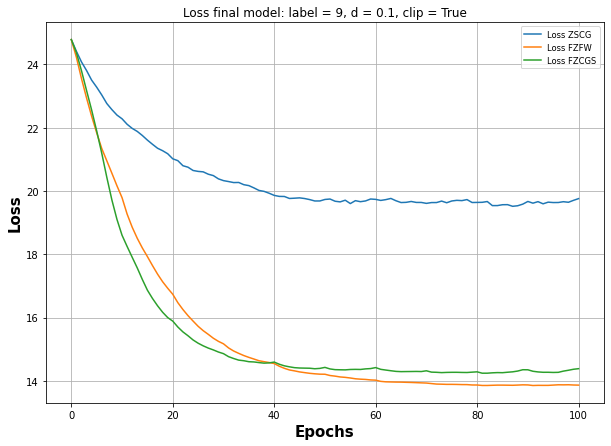

In [ ]:
# plot the loss
plot_loss_pert(loss_ZSGC_f_all, loss_FZFW_f_all, loss_FZCGS_f_all, 100, title ='Loss final model: label = 9, d = 0.1, clip = True', savefig='final_model_all_d01_CLIP.png', parameters = None)


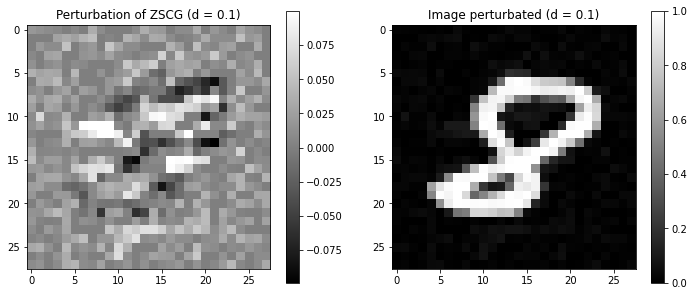

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Perturbation of ZSCG (d = 0.1)')
plt.imshow(np.reshape(p_ZSGC_f_all[-20],(28,28)), cmap='gray')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title('Image perturbated (d = 0.1)')
plt.imshow(np.reshape(x_ZSGC_f_all[-20],(28,28)), cmap='gray')
plt.colorbar()
plt.savefig('pert_ZSCG_all_lab_d01_CLIP.png')



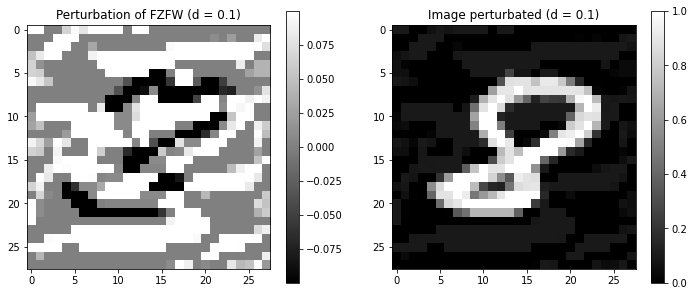

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Perturbation of FZFW (d = 0.1)')
plt.imshow(np.reshape(p_FZFW_f_all[-20],(28,28)), cmap='gray')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title('Image perturbated (d = 0.1)')
plt.imshow(np.reshape(x_FZFW_f_all[-20],(28,28)), cmap='gray')
plt.colorbar()
plt.savefig('pert_FZFW_all_lab_d01_CLIP.png')

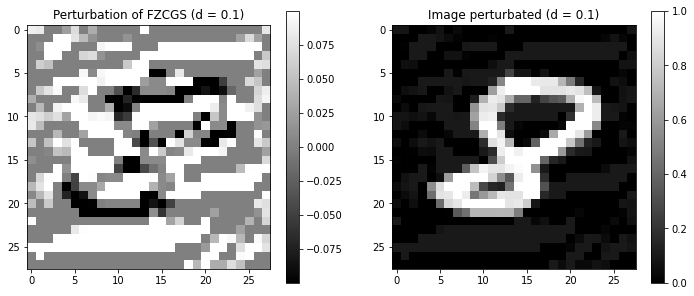

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Perturbation of FZCGS (d = 0.1)')
plt.imshow(np.reshape(p_FZCGS_f_all[-20],(28,28)), cmap='gray')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title('Image perturbated (d = 0.1)')
plt.imshow(np.reshape(x_FZCGS_f_all[-20],(28,28)), cmap='gray')
plt.colorbar()
plt.savefig('pert_FZCGS_all_lab_d01_CLIP.png')

In [ ]:
# attack succes rate
asr_ZSCG_all_val = misclassify_pred(x_ZSGC_f_all, y_extr)
asr_FZFW_all_val = misclassify_pred(x_FZFW_f_all, y_extr)
asr_FZCGS_all_val = misclassify_pred(x_FZCGS_f_all, y_extr)

In [ ]:
model = ['ZSCG', 'FZFW', 'FZCGS']
asr = [asr_ZSCG_all_val, asr_FZFW_all_val, asr_FZCGS_all_val] 
table = {'Model': model, 'ASR (%)': asr}
print('Distortion: 0.1')
print('Clip: True')
print(tabulate(table, headers='keys', tablefmt='grid'))

Distortion: 0.1
Clip: True
+---------+-----------+
| Model   |   ASR (%) |
+=========+===========+
| ZSCG    |         1 |
+---------+-----------+
| FZFW    |         1 |
+---------+-----------+
| FZCGS   |         3 |
+---------+-----------+


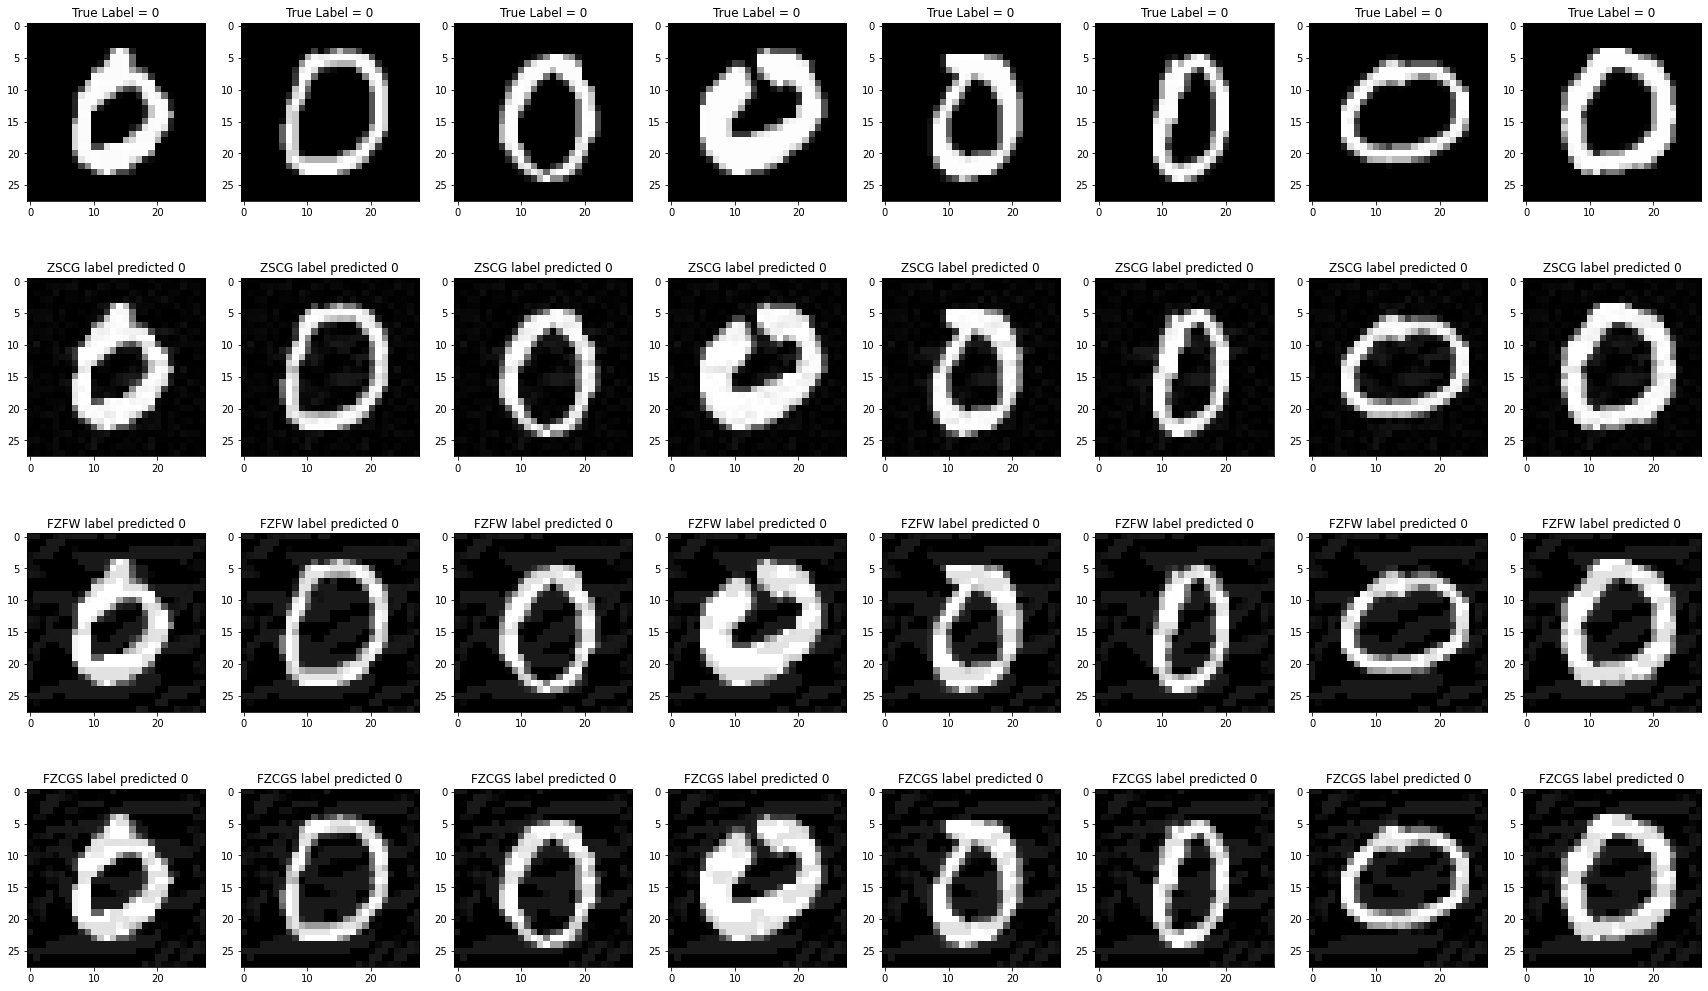

In [ ]:
final = {"ZSCG": x_ZSGC_f_all[:8], "FZFW": x_FZFW_f_all[:8], "FZCGS": x_FZCGS_f_all[:8]}
true_label = list(dnn_2.predict(x_extr[:8]).argmax(axis=1))
fig, ax = plt.subplots(4, 8, figsize=(30,18))
for i in range(8):
  ax[0, i].imshow(x_extr[i:i+1].reshape(28,28), cmap="gray")
  ax[0,i].set_title(f"True Label = {true_label[i]}")
row=0
for alg, data in final.items():
  row += 1
  predicted= dnn_2.predict(data).argmax(axis=1)
  
  for j in range(8):
    color="black"
    ax[row, j].figure
    ax[row, j].imshow(data[j:j+1].reshape(28,28), cmap="gray", )
    if predicted[j] != true_label[j]:
      color="red"
    ax[row, j].set_title(f"{alg} label predicted {predicted[j]}", color=color)


plt.show()